### Credit Card Fraud Detection
This project is related to building a Machine Learning module that can effectively detect Fraudlent Credit Card transactions and hence save money for the client Bank.

In [1]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

There are two datasets hosted by kaggle named test and train. Lets examine both the datasets to decide if they needs to be merged or if it is a good idea to keep the test dataset seperate for final evaluation.

In [4]:
# Importing both the datasets provided by kaggle
#fraud = pd.read_csv('gdrive/My Drive/Capstone Project/fraudTrain.csv')
#fraud_test = pd.read_csv('gdrive/My Drive/Capstone Project/fraudTest.csv')
fraud = pd.read_csv('../input/fraud-detection/fraudTrain.csv')
fraud_test = pd.read_csv('../input/fraud-detection/fraudTest.csv')

### Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Data Cleaning
- Outlier Treatment
- Variable Transformation

In [5]:
# check for the main (training) dataset
fraud.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
# checking for various columns and nulls in the dataset
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [7]:
# basic inspection of the test dataset
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [8]:
# checking % of data provided by Kaggle in the train & test
1296675 * 100 / (1296675 + 555719)

69.99995681264353

- 70% data is present in the train dataset and remaining 30% in the test dataset.
- No null values in either of the files

In [9]:
# Check for imbalance on target variable in the train dataset
fraud.is_fraud.value_counts(normalize=True)

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64

Fraud Distribution
0    0.994211
1    0.005789
Name: is_fraud, dtype: float64


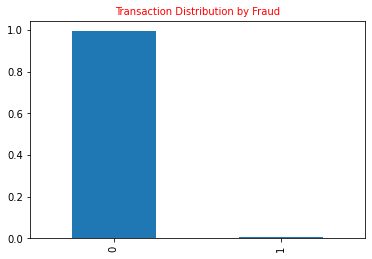

In [10]:
# Check for imbalance on target variable in the main dataset
print ('Fraud Distribution')
print (fraud.is_fraud.value_counts(normalize=True))
plt.title('Transaction Distribution by Fraud', fontsize= 10, color = 'Red', fontweight = 100)
fraud.is_fraud.value_counts(normalize=True).plot.bar()
plt.show()

In [11]:
# Check for imbalance on target variable in the test dataset
fraud_test.is_fraud.value_counts(normalize=True)

0    0.99614
1    0.00386
Name: is_fraud, dtype: float64

Both the datasets have high imbalnce of the target variable with the test dataset having slightly higher imbalance. At this point, lets keep the test data seperate. We will be building the model on the train dataset. If required, a validation dataset will be carved from it. The final evaluation will be done on the test dataset.

### Univariate Analysis
The following columns seems of very less/ no significance in determining a fraud case. Primary reason being no model can be created based on person's name or his PII or some unique ID/ S.no. assigned. Hence, dropping them:- 
- cc_num
- first 
- last 
- street 
- trans_num

In [12]:
# Dropping the unwanted columns from both datasets
fraud.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud.drop(fraud.iloc[:,[0]], axis=1, inplace=True)
fraud_test.drop(['cc_num', 'first', 'last', 'street', 'trans_num'], axis=1, inplace=True)
fraud_test.drop(fraud_test.iloc[:,[0]], axis=1, inplace=True)

In [13]:
# Inspecting the fraud dataset
fraud.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,1325376186,38.674999,-78.632459,0


In [14]:
# Inspecting the fraud test dataset
fraud_test.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,1371816917,44.959148,-85.884734,0


In [15]:
# Converting dob to age
from datetime import date
fraud['dob'] = pd.to_datetime(fraud['dob'])
fraud['age'] = (pd.to_datetime('now') - fraud['dob'])/ np.timedelta64(1, 'Y')
fraud['age'] = fraud['age'].astype(int)
fraud.drop(['dob'], axis=1, inplace=True)
fraud.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,34
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,43
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,60
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,55
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,36


In [16]:
# Same change on the test dataset
fraud_test['dob'] = pd.to_datetime(fraud_test['dob'])
fraud_test['age'] = (pd.to_datetime('now') - fraud_test['dob'])/ np.timedelta64(1, 'Y')
fraud_test['age'] = fraud_test['age'].astype(int)
fraud_test.drop(['dob'], axis=1, inplace=True)
fraud_test.head()

,trans_date_trans_time,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age
0,2020-06-21 12:14:25,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,54
1,2020-06-21 12:14:33,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,32
2,2020-06-21 12:14:53,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,51
3,2020-06-21 12:15:15,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,34
4,2020-06-21 12:15:17,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,66


In [17]:
# Seggregating data and time from trans_date_trans_time field
fraud['trans_date'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).date
fraud['trans_time'] = pd.DatetimeIndex(fraud['trans_date_trans_time']).time
fraud.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0,34,2019-01-01,00:00:18
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0,43,2019-01-01,00:00:44
2,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0,60,2019-01-01,00:00:51
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0,55,2019-01-01,00:01:16
4,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0,36,2019-01-01,00:03:06


In [18]:
# Same changes on test dataset
fraud_test['trans_date'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).date
fraud_test['trans_time'] = pd.DatetimeIndex(fraud_test['trans_date_trans_time']).time
fraud_test.drop(['trans_date_trans_time'], axis=1, inplace=True)
fraud_test.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud,age,trans_date,trans_time
0,fraud_Kirlin and Sons,personal_care,2.86,M,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0,54,2020-06-21,12:14:25
1,fraud_Sporer-Keebler,personal_care,29.84,F,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0,32,2020-06-21,12:14:33
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0,51,2020-06-21,12:14:53
3,fraud_Haley Group,misc_pos,60.05,M,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0,34,2020-06-21,12:15:15
4,fraud_Johnston-Casper,travel,3.19,M,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0,66,2020-06-21,12:15:17


In [19]:
# Check on numeric columns for outliers
fraud.describe()

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,age
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03,4.806238e+01
std,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02,1.740029e+01
min,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00,1.700000e+01
25%,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00,3.500000e+01
50%,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00,4.600000e+01
75%,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00,5.900000e+01
max,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00,9.700000e+01


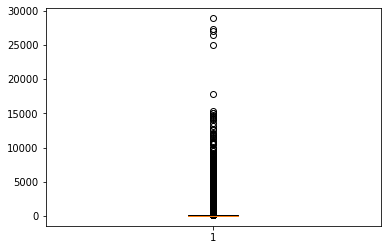

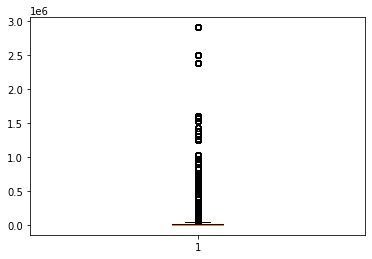

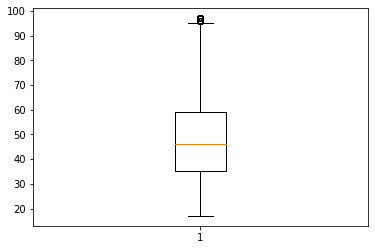

In [20]:
# Further checking distribution of continuous variables - amt, city_pop and age columns to see if there are any valid outliers
plt.boxplot(fraud.amt)
plt.show()
plt.boxplot(fraud.city_pop)
plt.show()
plt.boxplot(fraud.age)
plt.show()

The age column has no outliers while amt and city_pop stastically shows outliers. However, both amount and city population can vary drastically and none of them seems very high or very low. Hence, we will consider it as valid data.

In [21]:
# Identifying all the Numeric and non numeric columns
num = []
obj = []
for i in range (0,13):
    if fraud.iloc[:,i].dtype != 'O':
        num.append(i)
    else:
        obj.append(i)
print(num)
print(obj)
col_names = fraud.columns
print(col_names)

[2, 6, 7, 8, 9, 11, 12]
[0, 1, 3, 4, 5, 10]
Index(['merchant', 'category', 'amt', 'gender', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'age', 'trans_date', 'trans_time'],
      dtype='object')


In [22]:
# Checking the distribution of object variables
for i in obj:
    print (col_names[i])
    print (fraud.iloc[:,i].value_counts(normalize=True))
    print ('*' * 50)

merchant
fraud_Kilback LLC                       0.003396
fraud_Cormier LLC                       0.002814
fraud_Schumm PLC                        0.002803
fraud_Kuhn LLC                          0.002707
fraud_Boyer PLC                         0.002694
                                          ...   
fraud_Douglas, DuBuque and McKenzie     0.000598
fraud_Treutel-King                      0.000598
fraud_Medhurst, Labadie and Gottlieb    0.000585
fraud_Reichert-Weissnat                 0.000581
fraud_Hahn, Douglas and Schowalter      0.000561
Name: merchant, Length: 693, dtype: float64
**************************************************
category
gas_transport     0.101536
grocery_pos       0.095350
home              0.094947
shopping_pos      0.089978
kids_pets         0.087173
shopping_net      0.075225
entertainment     0.072504
food_dining       0.070535
personal_care     0.069993
health_fitness    0.066230
misc_pos          0.061430
misc_net          0.048807
grocery_net       0.0350

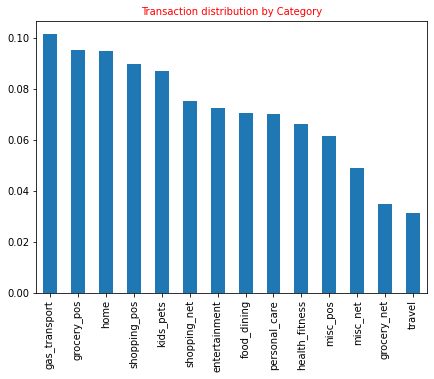

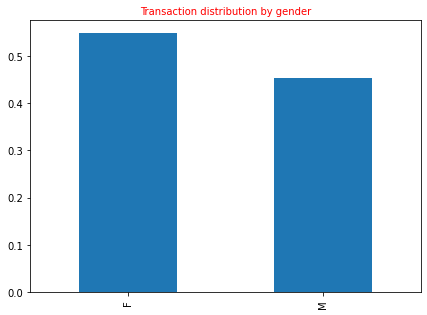

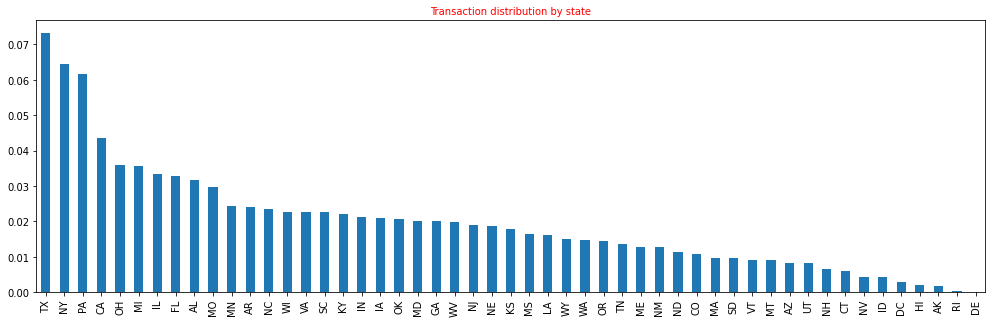

In [23]:
# Lets check the transaction distribution by Category, Gender and State variables
plt.figure(figsize = (7,5))
plt.title('Transaction distribution by Category', fontsize= 10, color = 'Red', fontweight = 100)
fraud.category.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (7,5))
plt.title('Transaction distribution by gender', fontsize= 10, color = 'Red', fontweight = 100)
fraud.gender.value_counts(normalize=True).plot.bar()
plt.show()

plt.figure(figsize = (17,5))
plt.title('Transaction distribution by state', fontsize= 10, color = 'Red', fontweight = 100)
fraud.state.value_counts(normalize=True).plot.bar()
plt.show()

### Bi-Variate Analysis
Check for the behaviour of various columns against the is_fraud column

In [24]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  object 
 1   category    1296675 non-null  object 
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  object 
 4   city        1296675 non-null  object 
 5   state       1296675 non-null  object 
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  object 
 11  unix_time   1296675 non-null  int64  
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
 15  age         1296675 non-null  int64  
 16  trans_date  1296675 non-null  object 
 17  trans_time  1296675 non-null  object 
dtypes: float64(5), int64(5

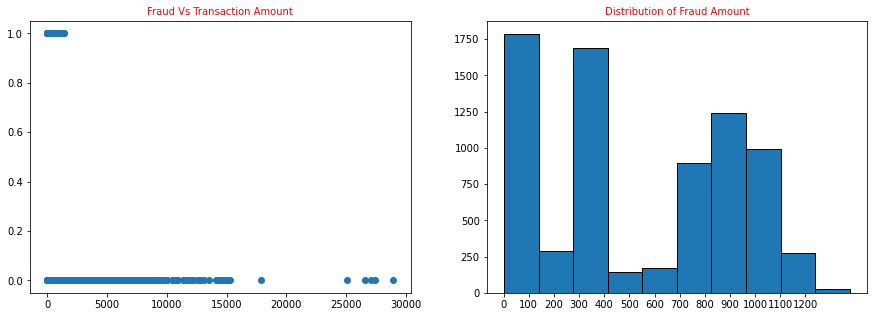

In [25]:
# Fraud Vs Amount
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
plt.title('Fraud Vs Transaction Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.amt, fraud.is_fraud)
plt.subplot(1,2,2)
#fraud.groupby('is_fraud')['amt'].mean().plot.bar()
#plt.xticks((0,1),['Not Fraud', 'Fraud'])
#plt.xticks(rotation=0)
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Fraud Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.amt, edgecolor='Black')
plt.xticks(np.arange(0, 1300, step=100))

plt.show()

As can be seen from above, frauds are happening in transactions with lower amount hence indicating there is a relation in them.

In [26]:
# Fraud transactions Vs merchant
# Total number of transactions per merchant
merch_tran_total = fraud.sort_values('merchant').groupby('merchant').count()['is_fraud']
merch_tran_total.head()

merchant
fraud_Abbott-Rogahn                 1844
fraud_Abbott-Steuber                1763
fraud_Abernathy and Sons            1751
fraud_Abshire PLC                   1895
fraud_Adams, Kovacek and Kuhlman     940
Name: is_fraud, dtype: int64

In [27]:
# Total fraud transactions per merchant
merch_tran_fraud = fraud[fraud.is_fraud == 1]['merchant'].value_counts()
merch_tran_fraud.head()

fraud_Rau and Sons       49
fraud_Cormier LLC        48
fraud_Kozey-Boehm        48
fraud_Doyle Ltd          47
fraud_Vandervort-Funk    47
Name: merchant, dtype: int64

In [28]:
# Percent of fraud transactions per merchant
fraud_perc = merch_tran_fraud/ merch_tran_total * 100
fraud_perc.sort_values(ascending=False)

fraud_Kozey-Boehm                        2.572347
fraud_Herman, Treutel and Dickens        2.538462
fraud_Kerluke-Abshire                    2.230686
fraud_Brown PLC                          2.210884
fraud_Goyette Inc                        2.161606
                                           ...   
fraud_Ritchie, Bradtke and Stiedemann         NaN
fraud_Romaguera and Sons                      NaN
fraud_Schroeder Group                         NaN
fraud_Schroeder, Wolff and Hermiston          NaN
fraud_Wiegand-Lowe                            NaN
Length: 693, dtype: float64

Baring a few merchants, most of them have equal distribution of transactions and hence this field may play important role in the model. Changing the alphabetic values to numeric as models expects numeric data.

In [29]:
# variable transformation - merchant
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
fraud.merchant = label_encoder.fit_transform(fraud.merchant)
fraud_test.merchant = label_encoder.fit_transform(fraud_test.merchant)

In [30]:
# Fraud transactions Vs City
# Percent distribution of fraud based on city
city_tran_total = fraud.sort_values('city').groupby('city').count()['is_fraud']
city_tran_fraud = fraud[fraud.is_fraud == 1]['city'].value_counts()
fraud_perc = city_tran_fraud/ city_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

East China    100.0
Walkertown    100.0
Freeport      100.0
Gaines        100.0
Granbury      100.0
dtype: float64

As can be seen, few cities have all transactions as fraud. All these cities have low transaction rate. There are 58 such cities.

In [31]:
# Transforming alphabetic city data into numeric to be processed by the model
fraud.city = label_encoder.fit_transform(fraud.city)
fraud_test.city = label_encoder.fit_transform(fraud_test.city)

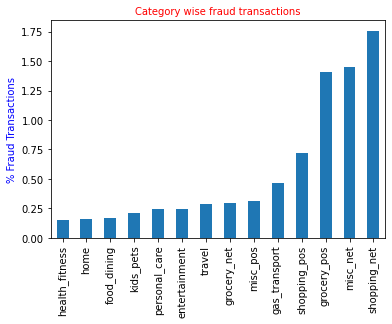

In [32]:
# category Vs fraud
# Percent distribution of fraud based on transaction category
cat_tran_total = fraud.sort_values('category').groupby('category').count()['is_fraud']
cat_tran_fraud = fraud[fraud.is_fraud == 1]['category'].value_counts()
fraud_perc = cat_tran_fraud/ cat_tran_total * 100
plt.title('Category wise fraud transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values().plot.bar()
plt.show()

In [33]:
# Transforming alphabetic category data into numeric to be processed by the model
fraud.category = label_encoder.fit_transform(fraud.category)
fraud_test.category = label_encoder.fit_transform(fraud_test.category)

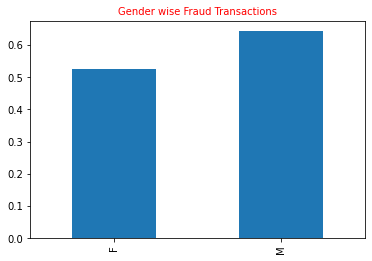

In [34]:
# Gender Vs Fraud
# Percent distribution of fraud based on Gender
gen_tran_total = fraud.sort_values('gender').groupby('gender').count()['is_fraud']
gen_tran_fraud = fraud[fraud.is_fraud == 1]['gender'].value_counts()
fraud_perc = gen_tran_fraud/ gen_tran_total * 100
plt.title('Gender wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
fraud_perc.sort_values().plot.bar()
plt.show()

In [35]:
# Transforming alphabetic gender data into numeric to be processed by the model
fraud.gender = fraud.gender.map({'M': 1, "F": 0})
fraud_test.gender = fraud_test.gender.map({'M': 1, "F": 0})

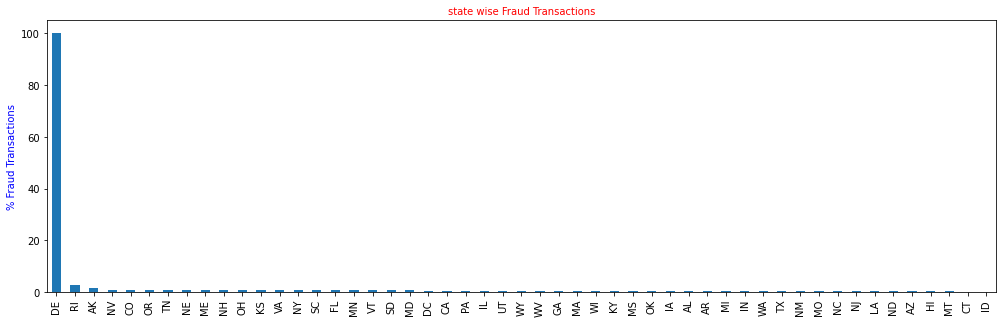

In [36]:
# state Vs fraud
# Percent distribution of fraud based on State
plt.figure(figsize = (17,5))
state_tran_total = fraud.sort_values('state').groupby('state').count()['is_fraud']
state_tran_fraud = fraud[fraud.is_fraud == 1]['state'].value_counts()
fraud_perc = state_tran_fraud/ state_tran_total * 100
plt.title('state wise Fraud Transactions', fontsize= 10, color = 'Red', fontweight = 100)
plt.ylabel('% Fraud Transactions', fontdict = {'fontsize': 10, 'color': 'Blue', 'fontweight' : '300'})
fraud_perc.sort_values(ascending=False).plot.bar()
plt.show()

In [37]:
fraud_perc.sort_values(ascending=False).head()

DE    100.000000
RI      2.727273
AK      1.698113
NV      0.838238
CO      0.814121
dtype: float64

This is very significant. While the number of transactions in DE is very less, all of them are fraud transaction. Rest all the states have very low fraud transaction.

In [38]:
# Transforming alphabetic state data into numeric to be processed by the model
fraud.state = label_encoder.fit_transform(fraud.state)
fraud_test.state = label_encoder.fit_transform(fraud_test.state)

In [39]:
# Job Vs Fraud
# Percent distribution of fraud based on Job
job_tran_total = fraud.sort_values('job').groupby('job').count()['is_fraud']
job_tran_fraud = fraud[fraud.is_fraud == 1]['job'].value_counts()
fraud_perc = job_tran_fraud/ job_tran_total * 100
fraud_perc.sort_values(ascending=False).head(20)

Armed forces technical officer       100.000000
Engineer, site                       100.000000
Information officer                  100.000000
Legal secretary                      100.000000
Industrial buyer                     100.000000
Careers adviser                      100.000000
Homeopath                            100.000000
Broadcast journalist                 100.000000
Personnel officer                    100.000000
Forest/woodland manager              100.000000
Sales promotion account executive    100.000000
Air traffic controller               100.000000
Contracting civil engineer           100.000000
Ship broker                          100.000000
Solicitor                            100.000000
Accountant, chartered                100.000000
Dancer                               100.000000
Warehouse manager                    100.000000
Veterinary surgeon                   100.000000
Lawyer                                 5.185185
dtype: float64

There seems certain jobs that have real high % of fraud transactions.

In [40]:
# Transforming alphabetic job data into numeric to be processed by the model
fraud.job = label_encoder.fit_transform(fraud.job)
fraud_test.job = label_encoder.fit_transform(fraud_test.job)

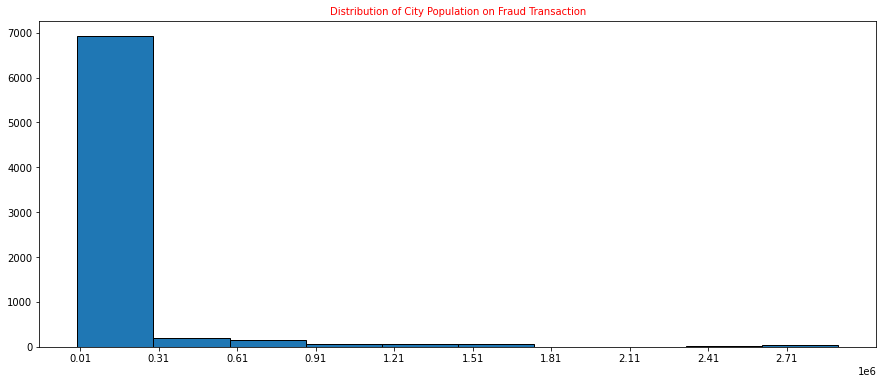

In [41]:
# Fraud Vs City Population
plt.figure(figsize=[15,6])
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of City Population on Fraud Transaction', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.city_pop, edgecolor='Black')
plt.xticks(np.arange(10000, 3000000, step=300000))
plt.show()

Cities with less population, tends to have more fraud cases.

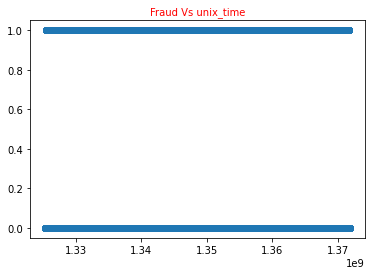

In [42]:
# Fraud Vs Unix Time
plt.title('Fraud Vs unix_time', fontsize= 10, color = 'Red', fontweight = 100)
plt.scatter(fraud.unix_time, fraud.is_fraud)
plt.show()

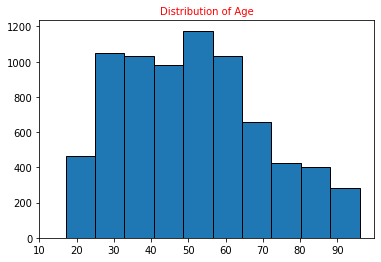

In [43]:
# Fraud Vs Age
temp = fraud[fraud.is_fraud == 1]
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(temp.age, edgecolor='Black')
plt.xticks(np.arange(10, 100, step=10))
plt.show()

So, people in age group 50 to 60 tends to be slightly more victims of fraud.

In [44]:
# Fraud Vs Zip
zip_tran_total = fraud.sort_values('zip').groupby('zip').count()['is_fraud']
zip_tran_fraud = fraud[fraud.is_fraud == 1]['zip'].value_counts()
fraud_perc = zip_tran_fraud/ zip_tran_total * 100
fraud_perc.sort_values(ascending=False).head(25)

77027    100.0
75246    100.0
11944    100.0
74108    100.0
11763    100.0
11747    100.0
32065    100.0
61364    100.0
28412    100.0
89109    100.0
10954    100.0
10553    100.0
16041    100.0
10533    100.0
16214    100.0
47842    100.0
10018    100.0
72135    100.0
90240    100.0
23117    100.0
43723    100.0
70065    100.0
12207    100.0
78208    100.0
78644    100.0
dtype: float64

As is evident from above stats, there are perticular ZIP codes that have 100% frauds.

In [45]:
# Fraud Vs lat
lat_tran_total = fraud.sort_values('lat').groupby('lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

66.6933    100.0
35.0271    100.0
42.2008    100.0
35.4359    100.0
30.5471    100.0
dtype: float64

As is evident from above stats, there are perticular latitudes codes that have 100% frauds.

In [46]:
# Fraud Vs long
long_tran_total = fraud.sort_values('long').groupby('long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

-83.8855    100.0
-88.9307    100.0
-76.2701    100.0
-81.7742    100.0
-88.4927    100.0
dtype: float64

In [47]:
# Fraud Vs merch_lat
lat_tran_total = fraud.sort_values('merch_lat').groupby('merch_lat').count()['is_fraud']
lat_tran_fraud = fraud[fraud.is_fraud == 1]['merch_lat'].value_counts()
fraud_perc = lat_tran_fraud/ lat_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

19.425114    100.0
40.920282    100.0
40.940052    100.0
40.934939    100.0
40.934619    100.0
dtype: float64

In [48]:
# Fraud Vs merch_long
long_tran_total = fraud.sort_values('merch_long').groupby('merch_long').count()['is_fraud']
long_tran_fraud = fraud[fraud.is_fraud == 1]['merch_long'].value_counts()
fraud_perc = long_tran_fraud/ long_tran_total * 100
fraud_perc.sort_values(ascending=False).head()

-166.550779    100.0
-81.993885     100.0
-81.998380     100.0
-81.999852     100.0
-82.003288     100.0
dtype: float64

- There are multiple demographies - Zip, City, States, Latitudes, Longitudes and Job types that have only Fraud transactions.
- Even though they have 100% frauds, the number of transactions is very low. For Example State DE had only 9 transactions in 2 years. Hence, it is very less likely to impact the model.

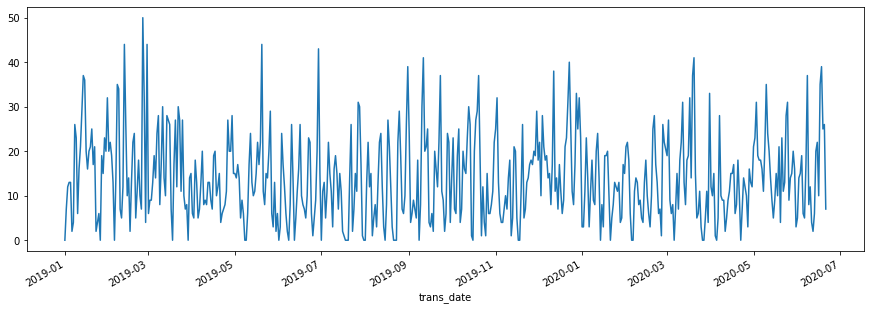

In [49]:
# Fraud Vs trans_date
fraud['trans_date'] =  pd.to_datetime(fraud['trans_date'])
plt.figure(figsize=[15,5])
fraud.groupby(['trans_date'])['is_fraud'].sum().plot()
plt.show()

Now its time to change date and time to a format more acceptable for modelling. Before that, lets pull some stats required for Cost sheet.
Also, it may be noticed that the train data is for 1.5 years (full 2019 till mid of 2020) and test data is for last 6 months of 2020. This way we will be able to build model on 1.5 year of data and test it on future data and hence check model performance in future. We will do the Cost Benifit analysis on the entire data.

In [50]:
# Total number of months
date_fraud = fraud.trans_date
date_fraud_test = pd.to_datetime(fraud_test.trans_date)
date_fraud = date_fraud.dt.to_period('M')
date_fraud_test = date_fraud_test.dt.to_period('M')
date = pd.concat([date_fraud, date_fraud_test])
print ('total number of records in file: ', date.size)

total number of records in file:  1852394


In [51]:
print ('Total number of months: ', date.value_counts().size)

Total number of months:  24


In [52]:
print ('Average transactions per month: ', round(date.size/date.value_counts().size,0) )

Average transactions per month:  77183.0


In [53]:
# Extracting fraud data
temp1 = fraud[['amt', 'is_fraud']]
temp2 = fraud_test[['amt', 'is_fraud']]
temp = pd.concat([temp1, temp2])
temp.shape

(1852394, 2)

In [54]:
# Average frauds per month
fraud_temp = temp[temp.is_fraud == 1]
print ('Average fraud transactions per month: ', round(fraud_temp.shape[0]/ date.value_counts().size,0))

Average fraud transactions per month:  402.0


In [55]:
# Average amount per fraud transaction
print ('Average amount per fraud transaction: ', round(sum(fraud_temp.amt)/ fraud_temp.shape[0], 2))

Average amount per fraud transaction:  530.66


In [56]:
# Average amount per fraud transaction
print ('max fraud amount : ' , max(fraud_temp.amt))

max fraud amount :  1376.04


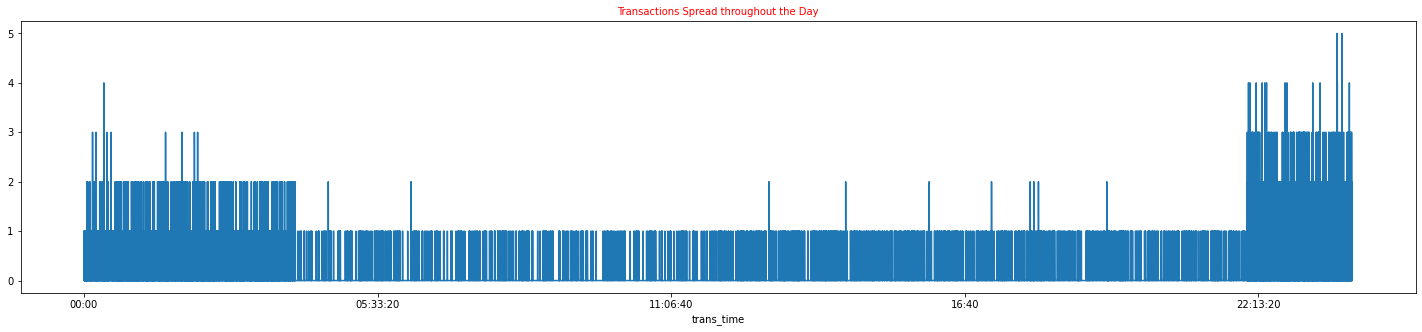

In [57]:
# Fraud Vs trans_time
import datetime as dt
fraud.trans_date = fraud.trans_date.map(dt.datetime.toordinal)
plt.figure(figsize=[25,5])
plt.title('Transactions Spread throughout the Day', fontsize= 10, color = 'Red', fontweight = 100)
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

So, late nights and early mornings are the most prone time for frauds. Highest frequency of frauds is between 10 pm to 12 am. 12 am to 4:00 am also shows very high frequency of fraud transactions.

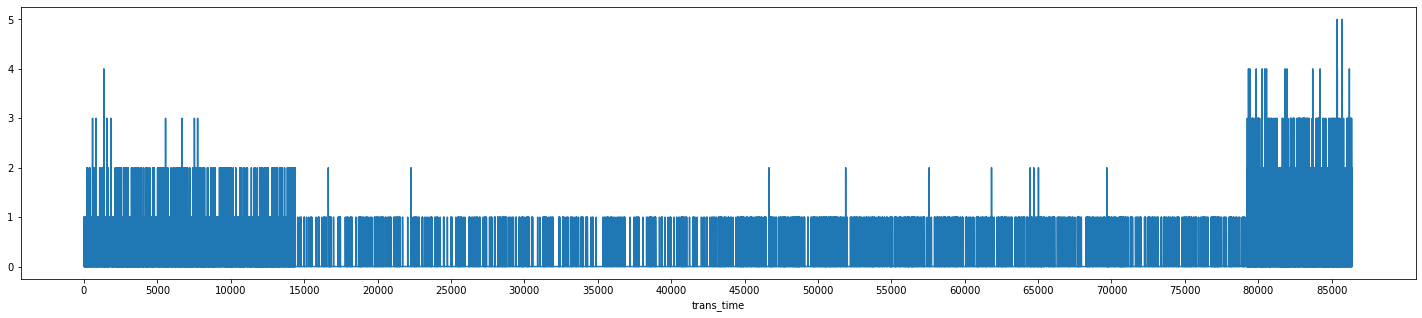

In [58]:
# Converting trans_time into seconds & ploting the above graph again
fraud.trans_time = pd.to_datetime(fraud.trans_time,format='%H:%M:%S')
fraud.trans_time = 3600 * pd.DatetimeIndex(fraud.trans_time).hour + 60 * pd.DatetimeIndex(fraud.trans_time).minute + pd.DatetimeIndex(fraud.trans_time).second
plt.figure(figsize=[25,5])
plt.xticks(np.arange(0,90000,5000))
fraud.groupby(['trans_time'])['is_fraud'].sum().plot()
plt.show()

In [59]:
# Similar data-time changes in test dataset
fraud_test['trans_date'] =  pd.to_datetime(fraud_test['trans_date'])
fraud_test.trans_date = fraud_test.trans_date.map(dt.datetime.toordinal)
fraud_test.trans_time = pd.to_datetime(fraud_test.trans_time,format='%H:%M:%S')
fraud_test.trans_time = 3600 * pd.DatetimeIndex(fraud_test.trans_time).hour + 60 * pd.DatetimeIndex(fraud_test.trans_time).minute + pd.DatetimeIndex(fraud_test.trans_time).second

In [60]:
print ('train : ', fraud.shape)
print ('test : ', fraud_test.shape)

train :  (1296675, 18)
test :  (555719, 18)


In [61]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 18 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  int64  
 1   category    1296675 non-null  int64  
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  int64  
 4   city        1296675 non-null  int64  
 5   state       1296675 non-null  int64  
 6   zip         1296675 non-null  int64  
 7   lat         1296675 non-null  float64
 8   long        1296675 non-null  float64
 9   city_pop    1296675 non-null  int64  
 10  job         1296675 non-null  int64  
 11  unix_time   1296675 non-null  int64  
 12  merch_lat   1296675 non-null  float64
 13  merch_long  1296675 non-null  float64
 14  is_fraud    1296675 non-null  int64  
 15  age         1296675 non-null  int64  
 16  trans_date  1296675 non-null  int64  
 17  trans_time  1296675 non-null  int64  
dtypes: float64(5), int64(1

In [62]:
fraud_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  int64  
 1   category    555719 non-null  int64  
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  int64  
 4   city        555719 non-null  int64  
 5   state       555719 non-null  int64  
 6   zip         555719 non-null  int64  
 7   lat         555719 non-null  float64
 8   long        555719 non-null  float64
 9   city_pop    555719 non-null  int64  
 10  job         555719 non-null  int64  
 11  unix_time   555719 non-null  int64  
 12  merch_lat   555719 non-null  float64
 13  merch_long  555719 non-null  float64
 14  is_fraud    555719 non-null  int64  
 15  age         555719 non-null  int64  
 16  trans_date  555719 non-null  int64  
 17  trans_time  555719 non-null  int64  
dtypes: float64(5), int64(13)
memory usage: 76.3 

### Train Test Split
Splitting the data into train & validate datasets. The test dataset provided will be used for final evaluation.

In [63]:
X = fraud.drop('is_fraud', axis=1)
X.head()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age,trans_date,trans_time
0,514,8,4.97,0,526,27,28654,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,34,737060,18
1,241,4,107.23,0,612,47,99160,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,43,737060,44
2,390,0,220.11,1,468,13,83252,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,60,737060,51
3,360,2,45.00,1,84,26,59632,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,55,737060,76
4,297,9,41.96,1,216,45,24433,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,36,737060,186


In [64]:
y = fraud['is_fraud']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [65]:
# Splitting the data into train and test such that ration of fraud is same in both
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, stratify=y, random_state=100)

In [66]:
# Inspecting the train and test datasets
print ('Train Dataset : ', X_train.shape)
print ('Test Dataset : ', X_test.shape)

Train Dataset :  (907672, 17)
Test Dataset :  (389003, 17)


In [67]:
# Creating X_final & y_final from the test dataset provided by Kaggle. This will be used for final evaluation of the model
X_final = fraud_test.drop('is_fraud', axis=1)
y_final = fraud_test['is_fraud']


### Data Scaling

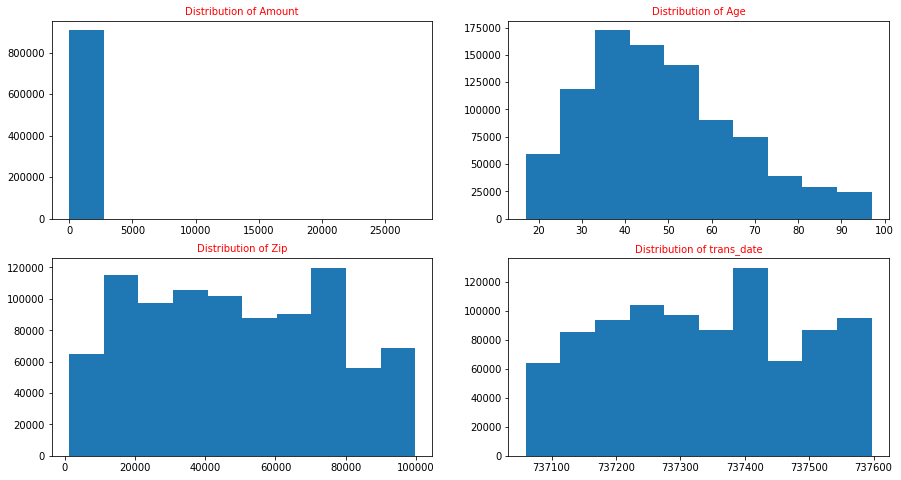

In [68]:
# Check distribution of few variables
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.trans_date)
plt.show()

In [69]:
X_train.describe()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age,trans_date,trans_time
count,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,9.076720e+05,907672.000000,9.076720e+05,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000
mean,342.855084,6.227442,70.403087,0.452915,445.367978,26.671861,48796.317389,38.531847,-90.221081,8.865586e+04,251.071731,1.349243e+09,38.531758,-90.220902,48.057959,737334.968842,47885.633688
std,200.882061,3.914077,161.066194,0.497778,258.624423,14.322665,26883.405204,5.078430,13.758647,3.017168e+05,140.116562,1.284306e+07,5.112183,13.771338,17.404277,148.810769,24570.364776
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1257.000000,20.027100,-165.672300,2.300000e+01,0.000000,1.325376e+09,19.027785,-166.670132,17.000000,737060.000000,0.000000
25%,166.000000,3.000000,9.660000,0.000000,224.000000,15.000000,26237.000000,34.620500,-96.790900,7.430000e+02,131.000000,1.338747e+09,34.730008,-96.889921,35.000000,737213.000000,27479.000000
50%,346.000000,6.000000,47.545000,0.000000,439.000000,27.000000,48174.000000,39.354300,-87.476900,2.456000e+03,251.000000,1.349239e+09,39.359416,-87.433180,46.000000,737335.000000,50894.000000
75%,514.000000,10.000000,83.170000,1.000000,677.000000,38.000000,72011.000000,41.894800,-80.158000,2.032800e+04,374.000000,1.359374e+09,41.952544,-80.239824,59.000000,737452.000000,68742.000000
max,692.000000,13.000000,27390.120000,1.000000,893.000000,50.000000,99783.000000,66.693300,-67.950300,2.906700e+06,493.000000,1.371817e+09,67.441518,-66.950902,97.000000,737597.000000,86399.000000


In [70]:
# Identify the variables to be scaled
vars_to_scale = ['merchant', 'category', 'amt', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'unix_time', 'merch_lat', 'merch_long', 'age', 'trans_date', 'trans_time']

In [71]:
# Lets try various scalers available in Scikit library. At optimum time, will finalize one.
# Based on various test results, QuantileTransformer with Gaussian distribution seems best suited.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import RobustScaler
#scaler = MinMaxScaler()
#scaler = StandardScaler()
#scaler = PowerTransformer()
scaler = QuantileTransformer(output_distribution='normal')
#scaler = RobustScaler()

In [72]:
# Scaling
X_train[vars_to_scale] = scaler.fit_transform(X_train[vars_to_scale])
X_test[vars_to_scale] = scaler.transform(X_test[vars_to_scale])
X_final[vars_to_scale] = scaler.transform(X_final[vars_to_scale])
X_train.describe()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age,trans_date,trans_time
count,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000,907672.000000
mean,-0.005454,-0.143770,0.001820,0.452915,0.001552,0.037147,-0.000676,-0.001809,0.002995,0.003032,0.000758,0.003378,-0.007783,-0.003692,-0.013488,-0.001747,0.000102
std,1.020784,1.826289,0.998399,0.497778,1.012852,1.146378,1.021740,1.011893,1.023659,1.044996,1.008468,1.005368,0.996109,1.001797,1.055380,1.025291,1.001351
min,-5.199338,-5.199338,-5.199338,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.673702,-0.634851,-0.668203,0.000000,-0.673702,-0.673702,-0.673702,-0.680013,-0.673702,-0.676854,-0.672129,-0.675358,-0.681697,-0.680952,-0.651824,-0.673702,-0.672172
50%,-0.003764,-0.018820,0.000986,0.000000,0.002509,-0.030114,-0.001255,-0.001255,0.002509,0.000000,0.005018,0.006315,-0.006271,-0.003861,0.001255,0.001255,-0.001848
75%,0.665852,0.743040,0.673702,1.000000,0.675277,0.642543,0.673702,0.681594,0.680013,0.672129,0.672129,0.682514,0.664000,0.671125,0.670557,0.676854,0.675277
max,5.199338,5.199338,5.199338,1.000000,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [73]:
# Inspection after scaling
X_test.describe()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age,trans_date,trans_time
count,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000,389003.000000
mean,-0.004873,-0.142028,0.000415,0.451703,0.000934,0.040727,0.000329,0.002173,0.002389,0.003324,0.002410,0.003177,-0.004159,-0.004653,-0.011585,-0.001903,0.001183
std,1.023501,1.827314,0.998639,0.497663,1.013273,1.154865,1.022714,1.009753,1.025599,1.046006,1.009974,1.003071,0.994897,1.002655,1.053615,1.022257,1.001238
min,-5.199338,-5.199338,-5.199338,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-4.521954,-5.199338,-5.199338,-5.199338,-5.199338
25%,-0.676854,-0.634851,-0.669772,0.000000,-0.670557,-0.673702,-0.673702,-0.676854,-0.680013,-0.676854,-0.672129,-0.673971,-0.679485,-0.682986,-0.651824,-0.673702,-0.670052
50%,-0.007527,-0.018820,-0.000717,0.000000,0.002509,0.013801,-0.001255,0.002509,0.002509,0.000000,0.007527,0.007720,-0.001576,-0.005252,0.001255,0.001255,0.000778
75%,0.665852,0.743040,0.671894,1.000000,0.675277,0.642543,0.681594,0.686350,0.680013,0.672129,0.681594,0.683760,0.668314,0.672659,0.670557,0.676854,0.674352
max,5.199338,5.199338,5.199338,1.000000,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338,5.199338


In [74]:
# Inspection after scaling
X_final.describe()

,merchant,category,amt,gender,city,state,zip,lat,long,city_pop,job,unix_time,merch_lat,merch_long,age,trans_date,trans_time
count,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,5.557190e+05,555719.000000
mean,-0.004146,-0.139589,-0.003431,0.451367,-0.111038,-0.087050,0.000983,0.000524,0.001311,-0.001181,-0.088097,5.199338e+00,-0.005595,-0.005517,-0.022923,5.199338e+00,0.001037
std,1.026368,1.825512,0.994999,0.497630,0.897887,0.949457,1.019682,1.009811,1.020111,1.042862,0.942980,8.881792e-16,0.994254,0.998942,1.067461,8.881792e-16,1.000708
min,-5.199338,-5.199338,-5.199338,0.000000,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,-5.199338,5.199338e+00,-5.199338,-5.199338,-5.199338,5.199338e+00,-5.199338
25%,-0.673702,-0.634851,-0.670557,0.000000,-0.711981,-0.761353,-0.668987,-0.676854,-0.676854,-0.684763,-0.708752,5.199338e+00,-0.677651,-0.682501,-0.651824,5.199338e+00,-0.669750
50%,-0.003764,-0.018820,-0.003584,0.000000,-0.064027,-0.070314,-0.001255,0.002509,0.002509,-0.007527,-0.056486,5.199338e+00,-0.002674,-0.004804,0.001255,5.199338e+00,-0.000173
75%,0.668987,0.743040,0.671291,1.000000,0.540882,0.529301,0.673702,0.681594,0.673702,0.664287,0.598435,5.199338e+00,0.664485,0.668230,0.670557,5.199338e+00,0.673998
max,5.199338,5.199338,5.199338,1.000000,1.679303,1.959536,5.199338,3.280373,5.199338,5.199338,1.910600,5.199338e+00,3.449044,5.199338,5.199338,5.199338e+00,5.199338


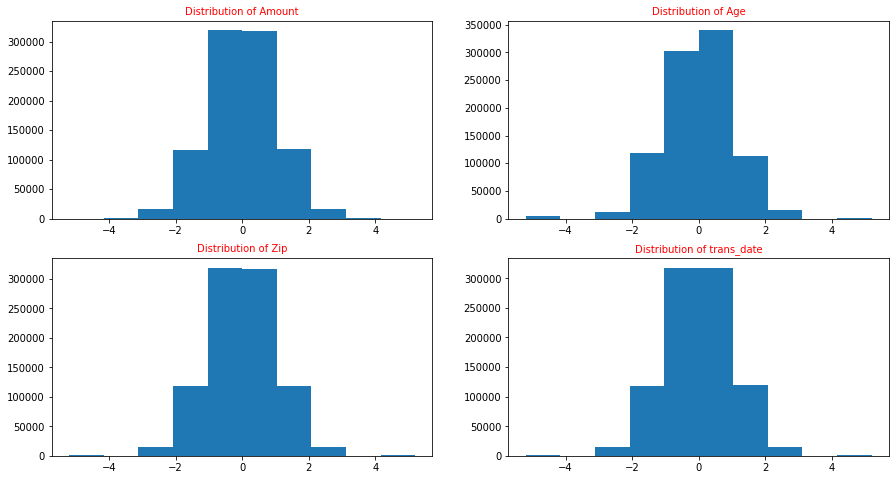

In [75]:
# Lets check the distribution after scaling
plt.figure(figsize=[15,8])
plt.subplot(2,2,1)
plt.title('Distribution of Amount', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.amt)
plt.subplot(2,2,2)
plt.title('Distribution of Age', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.age)
plt.subplot(2,2,3)
plt.title('Distribution of Zip', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.zip)
plt.subplot(2,2,4)
plt.title('Distribution of trans_date', fontsize= 10, color = 'Red', fontweight = 100)
plt.hist(X_train.trans_date)
plt.show()

Quite evident that post scaling Skewness in data has been handles and date is more normally distributed.

### Logistic Regression Model 
Lets start with a Basic Logistic Regression Model and check its Stats.

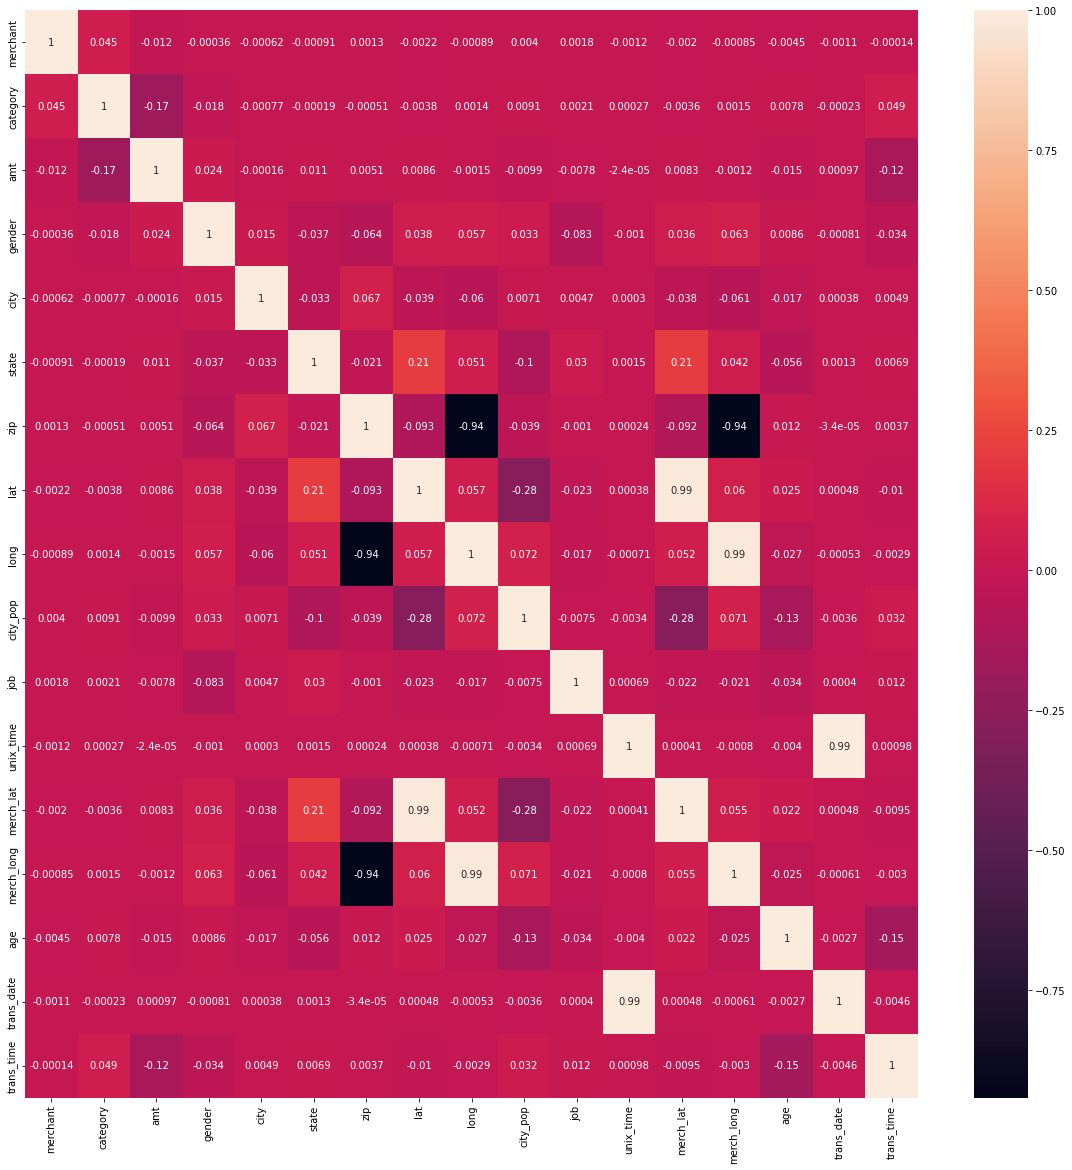

In [76]:
# Let's examine any correlation in variables and remove variables with high correlation
plt.figure(figsize = (20,20))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

In [77]:
# There is high correlation between variables long, merch_long and zip. Similarly merch_lat has high correlation with lat.
# This correlation will impact Linear Regression model but will be fine for other models. Hence, creating a different train & test dataframe for LR after dropping 'long', 'merch_long', 'merch_lat'.
X_train_lr = X_train.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_test_lr = X_test.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_final_lr = X_final.drop(['long', 'merch_long', 'merch_lat', 'unix_time'], axis=1)
X_train_lr.head()

,merchant,category,amt,gender,city,state,zip,lat,city_pop,job,age,trans_date,trans_time
549286,-1.142483,-0.225202,0.030790,0,-0.261387,1.431971,-1.837975,1.255743,0.229064,-0.997920,-1.606755,-0.193143,-0.277100
954585,0.580524,0.208505,-0.220540,0,0.691121,0.153660,1.374878,-0.426601,-0.803958,1.220640,-0.817902,0.631785,0.593978
273376,-1.079690,0.539431,-0.239076,1,1.327982,-0.761353,0.389783,0.007527,-0.280911,0.739737,-0.216204,-0.798769,-0.476450
113993,0.839121,-0.018820,-0.085729,1,-0.723343,-0.496390,0.624145,-1.494155,0.973449,-0.128317,-1.321946,-1.358913,0.192815
158189,0.135911,1.010382,-1.448487,1,0.743040,0.265284,-1.307063,0.562796,-0.053973,-1.327982,1.744448,-1.161976,-0.803900


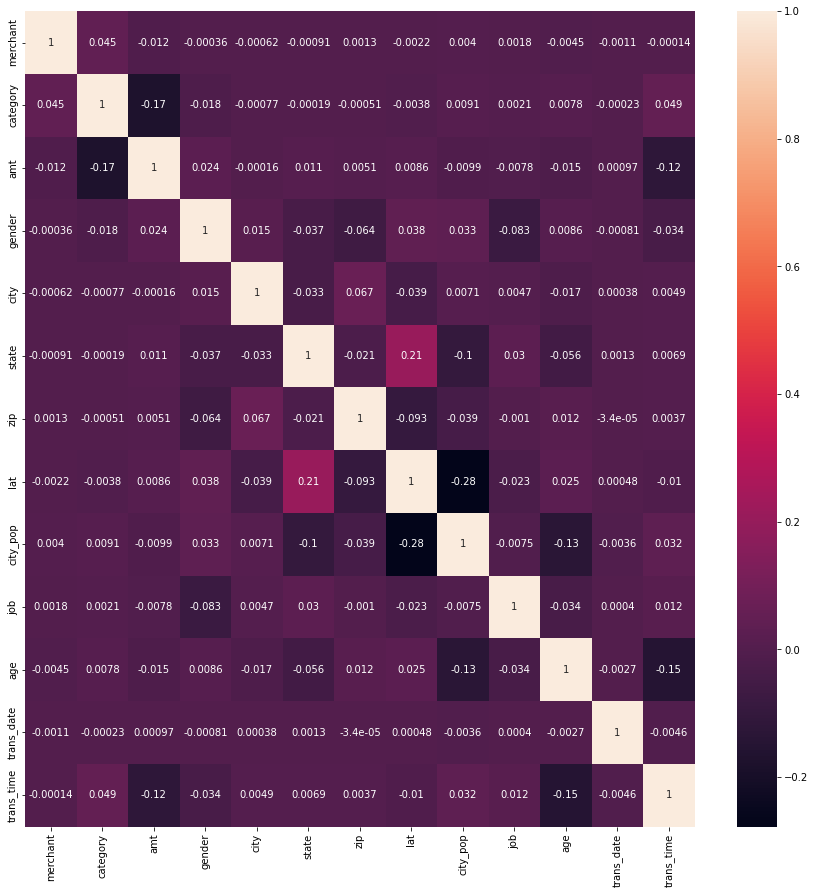

In [78]:
# Let's examine the correlation in variables again
plt.figure(figsize = (15,15))
sns.heatmap(X_train_lr.corr(), annot=True)
plt.show()

In [79]:
# Inspecting the dataset
print(X_train_lr.shape)
print(X_test_lr.shape)
print(X_final_lr.shape)

(907672, 13)
(389003, 13)
(555719, 13)


In [80]:
# Function to draw ROC curve
from sklearn import metrics
from sklearn.metrics import precision_recall_curve, confusion_matrix, accuracy_score
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [81]:
# Function to return various standard metrices for a model
def model_metrics(a, p):
  confusion = confusion_matrix(a, p)
  TP = confusion[1,1] # true positive 
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  print ('Accuracy    : ', metrics.accuracy_score(a, p ))
  print ('Sensitivity : ', TP / float(TP+FN))
  print ('Specificity : ', TN / float(TN+FP))
  print ('Pricision   : ', TP / float(TP + FP))
  print ('Recall      : ', TP / float(TP + FN))
  print(confusion)
  
  return None

In [82]:
# Function to calculate the train-test stats including cost of a model as cost is one of the factors to pick the final model
# Monthly cost of the model. Pass the classifier name here. Also pass 0 & 1
# 0 will print the model metrices with 1 will pass all the metrices to the calling routine

def cost_train_test(classifier, p):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)
  y_final_pred = classifier.predict(X_final)
  roc1 = metrics.roc_auc_score( y_train, y_train_pred)
  roc2 = metrics.roc_auc_score( y_test, y_test_pred)
  roc3 = metrics.roc_auc_score( y_final, y_final_pred)
  cm1 = confusion_matrix(y_train, y_train_pred)     # cm1 is confusion matrix of model on imbalanced train dataset
  cm2 = confusion_matrix(y_test, y_test_pred)       # cm2 is confusion matrix of model on test dataset
  cm3 = 0
  cm = cm1 + cm2 + cm3
  TP = cm[1,1] # true positive 
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = round (c1 + c2, 2)
  if p == 0:
    print(cm)
    print ('Average number of transactions per month detected as fraudulent by the model: ', tfpm)
    print ('Total cost of providing customer support per month for fraudulent transactions detected by the model: ', c1)
    print ('Average number of transactions per month that are fraudulent but not detected by the model: ', round(FN/24,0))
    print ('Cost incurred due to fraudulent transactions left undetected by the model: ', c2)
    print ('Cost incurred per month after the model is built and deployed: ', c3)
    return None
       
  else:
    print(cm)
    acc = (TP + TN)/ float(TP + TN + FP + FN)
    sen = TP / float(TP+FN)
    spe = TN / float(TN+FP)
    pre =  TP / float(TP + FP)
    rec =  TP / float(TP + FN)
    return (FP, FN, TP, c3, acc, sen, spe, pre, rec, roc1, roc2, roc3)

In [83]:
# Function to calculate the overall stats including cost of a model as cost is one of the factors to pick the final model
# Monthly cost of the model. Pass the classifier name here. Also pass 0 & 1
# 0 will print the model metrices with 1 will pass all the metrices to the calling routine

def cost(classifier, p):
  y_train_pred = classifier.predict(X_train)
  y_test_pred = classifier.predict(X_test)
  y_final_pred = classifier.predict(X_final)
  roc1 = metrics.roc_auc_score( y_train, y_train_pred)
  roc2 = metrics.roc_auc_score( y_test, y_test_pred)
  roc3 = metrics.roc_auc_score( y_final, y_final_pred)
  cm1 = confusion_matrix(y_train, y_train_pred)     # cm1 is confusion matrix of model on imbalanced train dataset
  cm2 = confusion_matrix(y_test, y_test_pred)       # cm2 is confusion matrix of model on test dataset
  cm3 = confusion_matrix(y_final, y_final_pred)     # cm3 is confusion matrix of model on final dataset
  cm = cm1 + cm2 + cm3
  TP = cm[1,1] # true positive 
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = round (c1 + c2, 2)
  if p == 0:
    print(cm)
    print ('Average number of transactions per month detected as fraudulent by the model: ', tfpm)
    print ('Total cost of providing customer support per month for fraudulent transactions detected by the model: ', c1)
    print ('Average number of transactions per month that are fraudulent but not detected by the model: ', round(FN/24,0))
    print ('Cost incurred due to fraudulent transactions left undetected by the model: ', c2)
    print ('Cost incurred per month after the model is built and deployed: ', c3)
    return None
       
  else:
    print(cm)
    acc = (TP + TN)/ float(TP + TN + FP + FN)
    sen = TP / float(TP+FN)
    spe = TN / float(TN+FP)
    pre =  TP / float(TP + FP)
    rec =  TP / float(TP + FN)
    return (FP, FN, TP, c3, acc, sen, spe, pre, rec, roc1, roc2, roc3)

In [84]:
# Logistic regression model
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train_lr)
lr_model = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
lr = lr_model.fit()

In [85]:
# Threshold of 0.5 is arbitrarily taken. Since, this is just a base model, we will evaluate threshold at a later stage.
y_train_pred = lr.predict(X_train_sm)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)

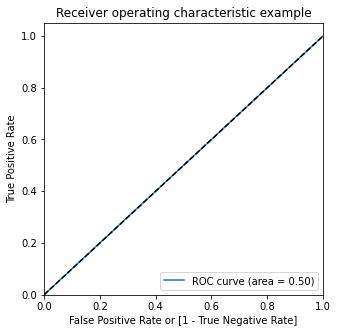

AUC for the LR Model 0.5002810642286715
Accuracy    :  0.9942060568134745
Sensitivity :  0.0005709935287400076
Specificity :  0.9999911349286029
Pricision   :  0.2727272727272727
Recall      :  0.0005709935287400076
[[902410      8]
 [  5251      3]]


In [86]:
draw_roc(y_train, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

- This model has a very high accuracy of 99% but is still not able to detedct any of the Fraud (True Positive). Reason being the data is highly imbalanced.
- Lets handle data imbalance before moving. We will use the following techinques:-
 - Random Under Sampling
 - Random Over Sampling
 - SMOTE
 - ADASYN

In [87]:
# Address imbalance using under sampling
from imblearn import under_sampling
us = under_sampling.RandomUnderSampler(random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train_lr, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

(10508, 13)
(10508,)
0    5254
1    5254
Name: is_fraud, dtype: int64


In [88]:
# Logistic Regression Model
X_train_us = sm.add_constant(X_train_us)
lr_model = sm.GLM(y_train_us ,X_train_us, family = sm.families.Binomial())
lr_us = lr_model.fit()

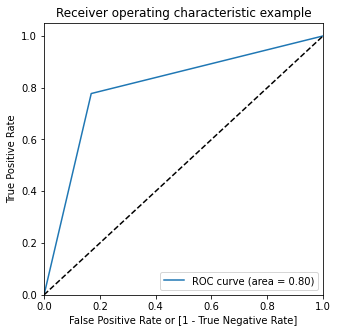

AUC for the LR Model 0.8042443852303007
Accuracy    :  0.8042443852303007
Sensitivity :  0.7775028549676437
Specificity :  0.8309859154929577
Pricision   :  0.8214357530665595
Recall      :  0.7775028549676437
[[4366  888]
 [1169 4085]]


In [89]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_us.predict(X_train_us)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_us, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

In [90]:
# Address imbalance using over sampling
from imblearn import over_sampling
ro = over_sampling.RandomOverSampler(random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train_lr, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

(1804836, 13)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64


In [91]:
# Logistic Regression Model
X_train_ro = sm.add_constant(X_train_ro)
lr_model = sm.GLM(y_train_ro ,X_train_ro, family = sm.families.Binomial())
lr_ro = lr_model.fit()

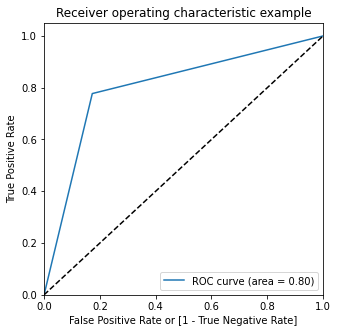

AUC for the LR Model 0.8022706772249667
Accuracy    :  0.8022706772249667
Sensitivity :  0.7773792189428845
Specificity :  0.8271621355070489
Pricision   :  0.8181069699694341
Recall      :  0.7773792189428845
[[746446 155972]
 [200897 701521]]


In [92]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_ro.predict(X_train_ro)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_ro, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [93]:
# Address imbalance using ADASYN
ada = over_sampling.ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train_lr, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

(1804961, 13)
(1804961,)
1    902543
0    902418
Name: is_fraud, dtype: int64


In [94]:
# Logistic Regression Model
X_train_ada = sm.add_constant(X_train_ada)
lr_model = sm.GLM(y_train_ada ,X_train_ada, family = sm.families.Binomial())
lr_ada = lr_model.fit()

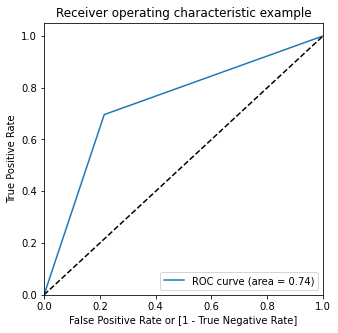

AUC for the LR Model 0.7402838670097988
Accuracy    :  0.7402808149317354
Sensitivity :  0.6962128120211447
Specificity :  0.784354921998453
Pricision   :  0.7635352214677678
Recall      :  0.6962128120211447
[[707816 194602]
 [274181 628362]]


In [95]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_ada.predict(X_train_ada)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_ada, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [96]:
# Address imbalance using SMOTE
from imblearn import over_sampling
smte = over_sampling.SMOTE(random_state=100)
X_train_smte, y_train_smte = smte.fit_resample(X_train_lr, y_train)
print (X_train_smte.shape)
print (y_train_smte.shape)
print (y_train_smte.value_counts())

(1804836, 13)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64


In [97]:
# Logistic Regression Model
X_train_smte = sm.add_constant(X_train_smte)
lr_model = sm.GLM(y_train_smte ,X_train_smte, family = sm.families.Binomial())
lr_smte = lr_model.fit()
X_train_smte.shape

(1804836, 14)

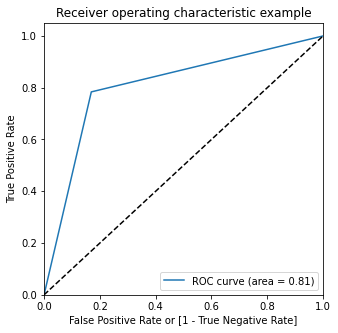

AUC for the LR Model 0.8072694693589889
Accuracy    :  0.8072694693589888
Sensitivity :  0.7838507210627448
Specificity :  0.8306882176552329
Pricision   :  0.822368398106844
Recall      :  0.7838507210627448
[[749628 152790]
 [195057 707361]]


In [98]:
# Basic prediction with threshold as 0.5
y_train_pred = lr_smte.predict(X_train_smte)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
draw_roc(y_train_smte, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

Based on the train mertices the model created on the SMOTE and Over Sampled data is slightly better than the rest. Lets evaluate the model created on SMOTE.

In [99]:
# Summary of LR model created on data cured for imbalance using SMOTE
lr_smte.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               is_fraud   No. Observations:              1804836
Model:                            GLM   Df Residuals:                  1804822
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -8.4275e+05
Date:                Thu, 28 Apr 2022   Deviance:                   1.6855e+06
Time:                        19:28:44   Pearson chi2:                 1.81e+06
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3639
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8364      0.003   -298.690      0.000      -0.842      -0.831
merchant      -0.0132      0.002     -6.454      0.000      -0.017      -0.009
category       0.1436      0.001    118.219      0.000       0.141       0.146
amt            1.1488      0.002    712.170      0.000       1.146       1.152
gender        -0.4035      0.004   -101.939      0.000      -0.411      -0.396
city          -0.0583      0.002    -29.917      0.000      -0.062      -0.054
state         -0.0005      0.002     -0.272      0.785      -0.004       0.003
zip            0.0018      0.002      0.938      0.348      -0.002       0.006
lat            0.0189      0.002      9.125      0.000       0.015       0.023
city_pop       0.0092      0.002      4.703      0.000       0.005       0.013
job            0.0137      0.002      7.063      0.000       0.010       0.018
age            0.0770      0.002     41.635      0.000       0.073       0.081
trans_date    -0.0916      0.002    -49.794      0.000      -0.095      -0.088
trans_time     0.1050      0.002     69.587      0.000       0.102       0.108
==============================================================================
"""

In [100]:
# Check the VIF of the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_smte.columns
vif['VIF'] = [variance_inflation_factor(X_train_smte.values, i) for i in range(X_train_smte.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif.head()

,Features,VIF
0,const,2.12
8,lat,1.15
9,city_pop,1.12
6,state,1.05
13,trans_time,1.05


VIF of all the variables is under 5 and hence no major correlation among variables. Also, the P value of all variables is low. Hence, we can consider this as a final model.

In [101]:
# Getting the predicted values on the train set
y_train_pred = lr_smte.predict(X_train_smte)

In [102]:
# Lets have a dataset with only the index, is_fraud and predicted is_fraud fields
lr_fraud_final = pd.DataFrame({'Fraud Index': y_train_smte.index, 'is_fraud':y_train_smte.values, 'is_fraud_Prob':y_train_pred})
lr_fraud_final.reset_index(drop=True, inplace=True)
lr_fraud_final.head()

,Fraud Index,is_fraud,is_fraud_Prob
0,0,0,0.282925
1,1,0,0.238224
2,2,0,0.184681
3,3,0,0.216416
4,4,0,0.065490


In [103]:
# To find the optimum cutoff, let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    lr_fraud_final[i]= lr_fraud_final.is_fraud_Prob.map(lambda x: 1 if x > i else 0)
lr_fraud_final.head()

,Fraud Index,is_fraud,is_fraud_Prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0,0.282925,1,1,1,0,0,0,0,0,0,0
1,1,0,0.238224,1,1,1,0,0,0,0,0,0,0
2,2,0,0.184681,1,1,0,0,0,0,0,0,0,0
3,3,0,0.216416,1,1,1,0,0,0,0,0,0,0
4,4,0,0.065490,1,0,0,0,0,0,0,0,0,0


In [104]:
# Printing confusion matrix at various cutoff
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sens','spec', 'prec', 'recall'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(lr_fraud_final.is_fraud, lr_fraud_final[i] )
    TN = cm[0,0]
    TP = cm[1,1]
    FP = cm[0,1]
    FN = cm[1,0]
    accuracy = (TN + TP)/ (TN + TP + FP + FN)
    sens = TP/ (FN + TP)
    spec = TN/ (TN + FP)
    prec = TP/ (TP + FP)
    recall = TP/ (TP + FN)
    cutoff_df.loc[i] =[ i ,accuracy,sens,spec, prec, recall]
print(cutoff_df)

     prob  accuracy      sens      spec      prec    recall
0.0   0.0  0.500000  1.000000  0.000000  0.500000  1.000000
0.1   0.1  0.557737  0.974835  0.140639  0.531478  0.974835
0.2   0.2  0.629694  0.878690  0.380697  0.586578  0.878690
0.3   0.3  0.702627  0.803535  0.601720  0.668601  0.803535
0.4   0.4  0.764099  0.787961  0.740238  0.752070  0.787961
0.5   0.5  0.807269  0.783851  0.830688  0.822368  0.783851
0.6   0.6  0.836657  0.776712  0.896601  0.882516  0.776712
0.7   0.7  0.830681  0.715152  0.946210  0.930047  0.715152
0.8   0.8  0.761030  0.543135  0.978924  0.962646  0.543135
0.9   0.9  0.628045  0.260880  0.995210  0.981968  0.260880


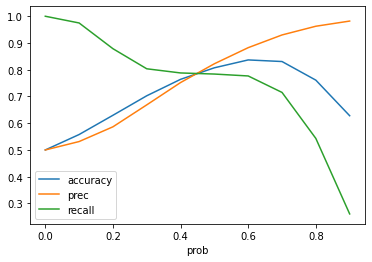

In [105]:
# Let's plot accuracy precision and recall for various probabilities.
# Recall ensures we have good TP while precision keeps a check on FN
cutoff_df.plot.line(x='prob', y=['accuracy','prec','recall'])
plt.show()

In [106]:
# Turn-out that 0.5 is optimum cut-off. Let's pull the stats for train & test datasets
y_train_pred = lr_smte.predict(X_train_smte)
y_train_pred = y_train_pred.map(lambda x: 1 if x > 0.5 else 0)
X_test_lr = sm.add_constant(X_test_lr)
y_test_pred = lr_smte.predict(X_test_lr)
y_test_pred = y_test_pred.map(lambda x: 1 if x > 0.5 else 0)

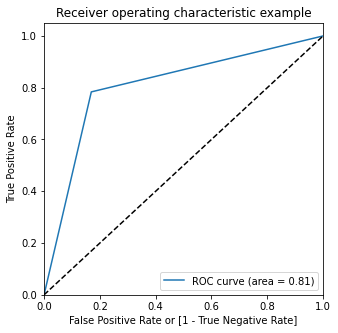

AUC for the LR Model 0.8072694693589889
Accuracy    :  0.8072694693589888
Sensitivity :  0.7838507210627448
Specificity :  0.8306882176552329
Pricision   :  0.822368398106844
Recall      :  0.7838507210627448
[[749628 152790]
 [195057 707361]]


In [107]:
# Model Metrices on training dataset
draw_roc(y_train_smte, y_train_pred)
print ('AUC for the LR Model', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

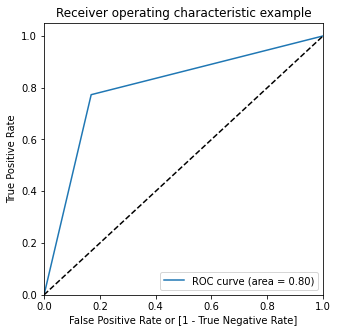

AUC for the LR Model 0.8021318073934077
Accuracy    :  0.8308367801790731
Sensitivity :  0.7730905861456483
Specificity :  0.831173028641167
Pricision   :  0.02597150742149623
Recall      :  0.7730905861456483
[[321457  65294]
 [   511   1741]]


In [108]:
# Model Metrices on test dataset
draw_roc(y_test, y_test_pred)
print ('AUC for the LR Model', metrics.roc_auc_score(y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

So the basic Regression model has a moderate AUC, Accuracy & Recall but a very low Precision. 

### Descision Tree 
Lets create a decision tree with all default parameters with Tree Depth set to 10 to control the size of tree for SMOTE and ADASYN train datasets. But before that, lets create dataset for various imbalances techinques that we will be using going forward.
Since Decision Trees, XGBOOST & Random Forest are not impacted by correlations among the variables. We will restore the dataset to all the final variables that were scaled.
It was noticed that the models build on the dataset with reduced columns were less effective overall.

In [109]:
X_train.shape

(907672, 17)

In [110]:
# Dataset for Under Sampling
us = under_sampling.RandomUnderSampler(random_state=100)
X_train_us, y_train_us = us.fit_resample(X_train, y_train)
print (X_train_us.shape)
print (y_train_us.shape)
print (y_train_us.value_counts())

(10508, 17)
(10508,)
0    5254
1    5254
Name: is_fraud, dtype: int64


In [111]:
# Dataset for Over Sampling
ro = over_sampling.RandomOverSampler(random_state=100)
X_train_ro, y_train_ro = ro.fit_resample(X_train, y_train)
print (X_train_ro.shape)
print (y_train_ro.shape)
print (y_train_ro.value_counts())

(1804836, 17)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64


In [112]:
# Dataset for SMOTE
smte = over_sampling.SMOTE(random_state=100)
X_train_smte, y_train_smte = smte.fit_resample(X_train, y_train)
print (X_train_smte.shape)
print (y_train_smte.shape)
print (y_train_smte.value_counts())

(1804836, 17)
(1804836,)
0    902418
1    902418
Name: is_fraud, dtype: int64


In [113]:
# Dataset for ADASYN
ada = over_sampling.ADASYN(random_state=100)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)
print (X_train_ada.shape)
print (y_train_ada.shape)
print (y_train_ada.value_counts())

(1805554, 17)
(1805554,)
1    903136
0    902418
Name: is_fraud, dtype: int64


In [114]:
# Function to create Decision Tree image
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
#import pydotplus

# function to print the decision graph
#def get_dt_graph(dt_classifier):
#    dot_data = StringIO()
#    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
#                    feature_names=X.columns, 
#                    class_names=['Fraud', "Not Fraud"])
#    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#    return graph

In [115]:
# Decision Tree Model with default parameters and under sampled train data
from sklearn.tree import DecisionTreeClassifier
dt_us = DecisionTreeClassifier(max_depth=10)
dt_us.fit(X_train_us, y_train_us)
y_train_pred = dt_us.predict(X_train_us)
y_test_pred = dt_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  0.9857251617814998
Accuracy    :  0.9857251617814998
Sensitivity :  0.9912447658926532
Specificity :  0.9802055576703465
Pricision   :  0.9804216867469879
Recall      :  0.9912447658926532
[[5150  104]
 [  46 5208]]


In [116]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9759197617663413
Accuracy    :  0.960772173207943
Sensitivity :  0.9912447658926532
Specificity :  0.9605947576400293
Pricision   :  0.12774725274725274
Recall      :  0.9912447658926532
[[866858  35560]
 [    46   5208]]


In [117]:
# Test the performance of the model on test dataset
y_test_pred = dt_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9660590266786594
Accuracy    :  0.960162260959427
Sensitivity :  0.9720248667850799
Specificity :  0.960093186572239
Pricision   :  0.1242126766157862
Recall      :  0.9720248667850799
[[371317  15434]
 [    63   2189]]


In [118]:
# Decision Graph for the above model
#gph = get_dt_graph(dt_us)
#Image(gph.create_png())

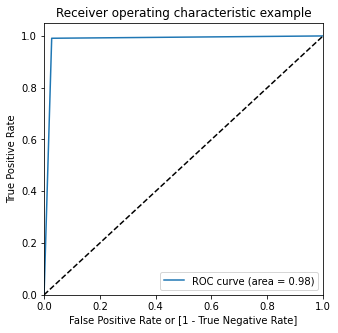

AUC         :  0.9818781318635044
Accuracy    :  0.9818781318635045
Sensitivity :  0.9910606836299808
Specificity :  0.9726955800970282
Pricision   :  0.9731879855189006
Recall      :  0.9910606836299808
[[877778  24640]
 [  8067 894351]]


In [119]:
# Decision Tree Model with default parameters and over sampled train data
dt_ro = DecisionTreeClassifier(max_depth=10)
dt_ro.fit(X_train_ro, y_train_ro)
y_train_pred = dt_ro.predict(X_train_ro)
y_test_pred = dt_ro.predict(X_test)
draw_roc(y_train_ro, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

In [120]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9818750074067174
Accuracy    :  0.972801849126116
Sensitivity :  0.9910544347164065
Specificity :  0.9726955800970282
Pricision   :  0.17445639427748183
Recall      :  0.9910544347164065
[[877778  24640]
 [    47   5207]]


In [121]:
# Test the performance of the model on test dataset
y_test_pred = dt_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9650269538582094
Accuracy    :  0.9725940416911952
Sensitivity :  0.9573712255772646
Specificity :  0.9726826821391541
Pricision   :  0.16948353116893325
Recall      :  0.9573712255772646
[[376186  10565]
 [    96   2156]]


In [122]:
#gph = get_dt_graph(dt_ro)
#Image(gph.create_png())

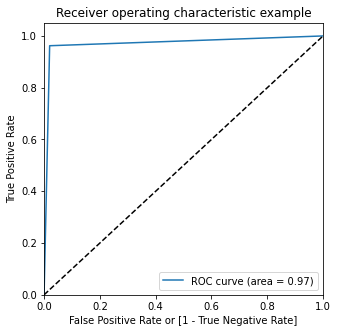

AUC         :  0.9711070701160659
Accuracy    :  0.9711070701160659
Sensitivity :  0.9621982274289742
Specificity :  0.9800159128031577
Pricision   :  0.9796533831863429
Recall      :  0.9621982274289742
[[884384  18034]
 [ 34113 868305]]


In [123]:
# Decision Tree Model with default parameters and SMOTE train data
dt_smte = DecisionTreeClassifier(max_depth=10)
dt_smte.fit(X_train_smte, y_train_smte)
y_train_pred = dt_smte.predict(X_train_smte)
y_test_pred = dt_smte.predict(X_test)
draw_roc(y_train_smte, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

In [124]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9628857637864285
Accuracy    :  0.9798175993090015
Sensitivity :  0.9457556147696993
Specificity :  0.9800159128031577
Pricision   :  0.21601530235186714
Recall      :  0.9457556147696993
[[884384  18034]
 [   285   4969]]


In [125]:
# Test the performance of the model on test dataset
y_test_pred = dt_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9527663940981059
Accuracy    :  0.9789384657701868
Sensitivity :  0.9262877442273535
Specificity :  0.9792450439688585
Pricision   :  0.20626915850885
Recall      :  0.9262877442273535
[[378724   8027]
 [   166   2086]]


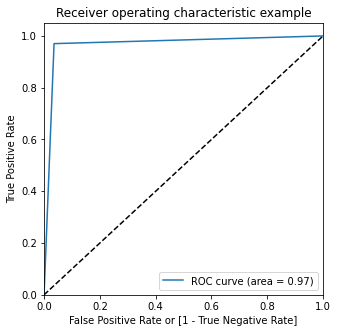

AUC         :  0.9672481849650234
Accuracy    :  0.9672493871687028
Sensitivity :  0.9702713655529178
Specificity :  0.964225004377129
Pricision   :  0.9644672788367668
Recall      :  0.9702713655529178
[[870134  32284]
 [ 26849 876287]]


In [126]:
# Decision Tree Model with default parameters and ADASYN train data
dt_ada = DecisionTreeClassifier(max_depth=10)
dt_ada.fit(X_train_ada, y_train_ada)
y_train_pred = dt_ada.predict(X_train_ada)
y_test_pred = dt_ada.predict(X_test)
draw_roc(y_train_ada, y_train_pred)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

In [127]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9624132254470342
Accuracy    :  0.9642040296494769
Sensitivity :  0.9606014465169395
Specificity :  0.964225004377129
Pricision   :  0.13519594974685917
Recall      :  0.9606014465169395
[[870134  32284]
 [   207   5047]]


In [128]:
# Test the performance of the model on test dataset
y_test_pred = dt_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9548341506835468
Accuracy    :  0.9637380688580808
Sensitivity :  0.9458259325044405
Specificity :  0.9638423688626533
Pricision   :  0.13218319473749535
Recall      :  0.9458259325044405
[[372767  13984]
 [   122   2130]]


Based on the AUC, cost and other metrices, Decision Tree created on undersampled data seems to be more accurate that rest of the models. Lets create a dataset to store all the important features of a model.

In [129]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
model_selector_tt = pd.DataFrame( columns = ['model', 'FP','FN','TP','Cost', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall',
                                          'ROC - Train', 'ROC - Test', 'ROC - Final'])
c = cost_train_test(dt_us, 1)
model_selector_tt.loc[0] = ['DT - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_ro, 1)
model_selector_tt.loc[1] = ['DT - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_smte, 1)
model_selector_tt.loc[2] = ['DT - SMOTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost_train_test(dt_ada, 1)
model_selector_tt.loc[3] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1238175   50994]
 [    109    7397]]
[[1253964   35205]
 [    143    7363]]
[[1263108   26061]
 [    451    7055]]
[[1242901   46268]
 [    329    7177]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098


In [130]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
model_selector = pd.DataFrame( columns = ['model', 'FP','FN','TP','Cost', 'Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'Recall',
                                          'ROC - Train', 'ROC - Test', 'ROC - Final'])
c = cost(dt_us, 1)
model_selector.loc[0] = ['DT - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_ro, 1)
model_selector.loc[1] = ['DT - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_smte, 1)
model_selector.loc[2] = ['DT - SMOTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
c = cost(dt_ada, 1)
model_selector.loc[3] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1771207   71536]
 [    219    9432]]
[[1792398   50345]
 [    266    9385]]
[[1801893   40850]
 [    626    9025]]
[[1776766   65977]
 [    471    9180]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098


- Let's use the GridSearch CV method to test various parameters on the best model till now. 
- Also let's define a new metric/ score for model evaluation. This is based on cost of the model. Lower the cost, better its rank.

In [131]:
# Lets define a new custom score to be used for various Grid Search CV models. Instead of using Accuracy or Precision, 
# we will directly use the cost of model. Lower the cose, better the rating. 
# This way we will reduce score for False Negatives as well as False Posotoves.
from sklearn.metrics import make_scorer

# Function to calculate Monthly cost of the model
def my_score(a, p):
  cm = confusion_matrix(a, p)     
  TP = cm[1,1] # true positive 
  TN = cm[0,0] # true negatives
  FP = cm[0,1] # false positives
  FN = cm[1,0] # false negatives
  tfpm = round((TP + FP)/ 24, 0)
  c1 = 1.5 * tfpm
  c2 = round (530.66 * round(FN/24,0), 2)
  c3 = c1 + c2
  
  return c3

In [132]:
from sklearn.model_selection import GridSearchCV

In [133]:
# Parameter Grid to be tested
params = {
    'max_depth': [6, 8, 10],
    'max_features': [8, 12, 14, 17],
    'class_weight': ['balanced'],
    'min_samples_leaf': [50, 100, 500, 750],
    'random_state':[0, 21, 42, 63, 100]
}
dt = DecisionTreeClassifier()

In [134]:
# Instantiate the grid search model
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_dt_us = GridSearchCV(estimator=dt, 
                                  param_grid=params, 
                                  cv=3, n_jobs=-1, verbose=2, scoring = my_scorer)

In [135]:
# Fitting the data as per the grid defined
grid_search_dt_us.fit(X_train_us, y_train_us)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] END class_weight=balanced, max_depth=6, max_features=8, min_samples_leaf=50, random_state=21; total time=   0.1s
[CV] END class_weight=balanced, max_depth=6, max_features=8, min_samples_leaf=50, random_state=21; total time=   0.0s
[CV] END class_weight=balanced, max_depth=6, max_features=8, min_samples_leaf=50, random_state=42; total time=   0.0s
[CV] END class_weight=balanced, max_depth=6, max_features=8, min_samples_leaf=50, random_state=100; total time=   0.0s
[CV] END class_weight=balanced, max_depth=6, max_features=8, min_samples_leaf=100, random_state=0; total time=   0.0s
[CV] END class_weight=balanced, max_depth=6, max_features=8, min_samples_leaf=100, random_state=21; total time=   0.1s
[CV] END class_weight=balanced, max_depth=6, max_features=8, min_samples_leaf=100, random_state=63; total time=   0.0s
[CV] END class_weight=balanced, max_depth=6, max_features=8, min_samples_leaf=100, random_state=100; total t

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'], 'max_depth': [6, 8, 10],
                         'max_features': [8, 12, 14, 17],
                         'min_samples_leaf': [50, 100, 500, 750],
                         'random_state': [0, 21, 42, 63, 100]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=2)

In [136]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_dt_us.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_max_depth,param_max_features,param_min_samples_leaf,param_random_state,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
114,0.043697,0.003987,0.004729,0.000103,balanced,8,12,500,100,"{'class_weight': 'balanced', 'max_depth': 8, '...",-1716.48,-1717.98,-1187.32,-1540.593333,249.802720,1
194,0.048708,0.008184,0.005010,0.000428,balanced,10,12,500,100,"{'class_weight': 'balanced', 'max_depth': 10, ...",-1716.48,-1717.98,-1187.32,-1540.593333,249.802720,1
34,0.045063,0.006909,0.004810,0.000305,balanced,6,12,500,100,"{'class_weight': 'balanced', 'max_depth': 6, '...",-1716.48,-1717.98,-1187.32,-1540.593333,249.802720,1
202,0.080144,0.002757,0.004837,0.000210,balanced,10,14,50,42,"{'class_weight': 'balanced', 'max_depth': 10, ...",-1704.48,-2762.80,-1702.98,-2056.753333,499.250761,4
200,0.081732,0.010309,0.005051,0.000184,balanced,10,14,50,0,"{'class_weight': 'balanced', 'max_depth': 10, ...",-2233.64,-1704.48,-2233.64,-2057.253333,249.448416,5


In [137]:
# Getting the best model based on the score
dt_best = grid_search_dt_us.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_features=12,
                       min_samples_leaf=500, random_state=100)

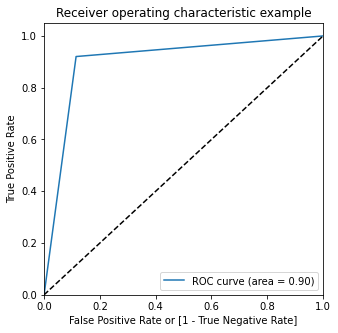

Accuracy    :  0.9028359345260754
Sensitivity :  0.9204415683288922
Specificity :  0.8852303007232585
Pricision   :  0.8891340319911748
Recall      :  0.9204415683288922
[[4651  603]
 [ 418 4836]]


In [138]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_us)
draw_roc(y_train_us, y_train_pred)
model_metrics(y_train_us, y_train_pred)

In [139]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.903218375081294
Accuracy    :  0.8861945724887405
Sensitivity :  0.9204415683288922
Specificity :  0.8859951818336957
Pricision   :  0.044895837201529946
Recall      :  0.9204415683288922
[[799538 102880]
 [   418   4836]]


In [140]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9051246986480206
Accuracy    :  0.8859623190566653
Sensitivity :  0.9245115452930728
Specificity :  0.8857378520029683
Pricision   :  0.04499384090074125
Recall      :  0.9245115452930728
[[342560  44191]
 [   170   2082]]


In [141]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[4] = ['DT - Grid Search US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1142098  147071]
 [    588    6918]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842


In [142]:
# getting the cost of overall model
c = cost(dt_best, 1)
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
model_selector.loc[4] = ['DT - Grid Search US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1632594  210149]
 [    799    8852]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842


### XGBOOST

In [143]:
from xgboost import XGBClassifier

In [144]:
# XGBOOST estimator on Undersampled data
xgb_us = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=100)
xgb_us.fit(X_train_us, y_train_us)

[19:34:39] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=17, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=100, reg_alpha=0, ...)

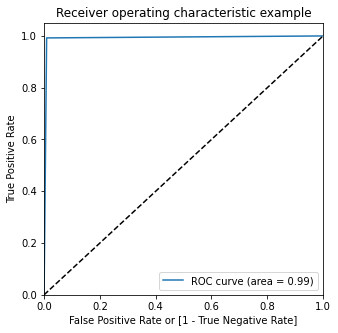

Accuracy    :  0.9916254282451465
Sensitivity :  0.9923867529501332
Specificity :  0.9908641035401599
Pricision   :  0.9908779931584949
Recall      :  0.9923867529501332
[[5206   48]
 [  40 5214]]


In [145]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_us.predict(X_train_us)
draw_roc(y_train_us, y_train_pred)
model_metrics(y_train_us, y_train_pred)

In [146]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9829838660264718
Accuracy    :  0.9736898350946157
Sensitivity :  0.9923867529501332
Specificity :  0.9735809791028105
Pricision   :  0.17945276200309757
Recall      :  0.9923867529501332
[[878577  23841]
 [    40   5214]]


In [147]:
# Test the performance of the model on test dataset
y_test_pred = xgb_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9731905014977601
Accuracy    :  0.9730259149672368
Sensitivity :  0.9733570159857904
Specificity :  0.9730239870097298
Pricision   :  0.1736237623762376
Recall      :  0.9733570159857904
[[376318  10433]
 [    60   2192]]


In [148]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_us, 1)
model_selector_tt.loc[5] = ['XGB - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1254895   34274]
 [    100    7406]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685


In [149]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_us, 1)
model_selector.loc[5] = ['XGB - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1793263   49480]
 [    184    9467]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685


In [150]:
# XGBOOST estimator on Oversampled data
xgb_ro = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=41)
xgb_ro.fit(X_train_ro, y_train_ro)

[19:34:49] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=17, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=41, reg_alpha=0, ...)

In [151]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9927084787759108
Accuracy    :  0.992708478775911
Sensitivity :  0.9949834777231837
Specificity :  0.9904334798286382
Pricision   :  0.9904768103216242
Recall      :  0.9949834777231837
[[893785   8633]
 [  4527 897891]]


In [152]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9927424346231125
Accuracy    :  0.9904602102962303
Sensitivity :  0.9950513894175866
Specificity :  0.9904334798286382
Pricision   :  0.3771733641151432
Recall      :  0.9950513894175866
[[893785   8633]
 [    26   5228]]


In [153]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.972827907554474
Accuracy    :  0.9898612607100716
Sensitivity :  0.955595026642984
Specificity :  0.9900607884659639
Pricision   :  0.3589059372915277
Recall      :  0.955595026642984
[[382907   3844]
 [   100   2152]]


In [154]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ro, 1)
model_selector_tt.loc[6] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1276692   12477]
 [    126    7380]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200


In [155]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ro, 1)
model_selector.loc[6] = ['DT - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1824621   18122]
 [    262    9389]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200


In [156]:
# XGBOOST estimator on SMOTE
xgb_smte = XGBClassifier(max_depth=10, n_estimators = 10, max_features = 17, random_state=41)
xgb_smte.fit(X_train_smte, y_train_smte)

[19:35:39] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=17, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=10, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=41, reg_alpha=0, ...)

In [157]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.9903786271993688
Accuracy    :  0.9903786271993688
Sensitivity :  0.9884731909159613
Specificity :  0.9922840634827763
Pricision   :  0.9922545465466935
Recall      :  0.9884731909159613
[[895455   6963]
 [ 10402 892016]]


In [158]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9768234173523513
Accuracy    :  0.9921050776051261
Sensitivity :  0.9613627712219261
Specificity :  0.9922840634827763
Pricision   :  0.4204261694689529
Recall      :  0.9613627712219261
[[895455   6963]
 [   203   5051]]


In [159]:
# Test the performance of the model on test dataset
y_test_pred = xgb_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.963194288132836
Accuracy    :  0.9913342570622848
Sensitivity :  0.9347246891651865
Specificity :  0.9916638871004858
Pricision   :  0.3950084443610433
Recall      :  0.9347246891651865
[[383527   3224]
 [   147   2105]]


In [160]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_smte, 1)
model_selector_tt.loc[7] = ['XGB - Smote - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1278982   10187]
 [    350    7156]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359


In [161]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_smte, 1)
model_selector.loc[7] = ['XGB - Smote - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1828262   14481]
 [    512    9139]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359


In [162]:
# XGBOOST estimator on ADASYN
xgb_ada = XGBClassifier(loss = 'exponential', max_depth=8, n_estimators = 10, max_features = 14, random_state=63)
xgb_ada.fit(X_train_ada, y_train_ada)

[19:36:48] WARNING: ../src/learner.cc:627: 
Parameters: { "loss", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, loss='exponential', max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=8,
              max_features=14, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=63, ...)

In [163]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.9788223599351283
Accuracy    :  0.978820904830318
Sensitivity :  0.975163209084789
Specificity :  0.9824815107854675
Pricision   :  0.9823661426369248
Recall      :  0.975163209084789
[[886609  15809]
 [ 22431 880705]]


In [164]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9730641280611768
Accuracy    :  0.9823724869776748
Sensitivity :  0.9636467453368862
Specificity :  0.9824815107854675
Pricision   :  0.24257378305864316
Recall      :  0.9636467453368862
[[886609  15809]
 [   191   5063]]


In [165]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9674724979097052
Accuracy    :  0.981845898360681
Sensitivity :  0.9529307282415631
Specificity :  0.9820142675778473
Pricision   :  0.23577235772357724
Recall      :  0.9529307282415631
[[379795   6956]
 [   106   2146]]


In [166]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ada, 1)
model_selector_tt.loc[8] = ['XGB - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1266404   22765]
 [    297    7209]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030


In [167]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ada, 1)
model_selector.loc[8] = ['XGB - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1810640   32103]
 [    428    9223]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030


XGBOOST seems to have reduced the count of False Positives and cost better than Decision tree. It has also increased the count of True Positives. Among various models of XGBOOST, the one on over sampled data seems best. Lets try GridSearch CV to test various parameters on random oversampled data.

In [168]:
params = {
    'learning_rate': [0.1, 0.5, 0.9],
    'max_depth': [8, 10],
    'n_estimators': [10, 15],
    'max_features': [14],
    'class_weight': ['balanced']
}

In [169]:
# XGB - GridSearch CV on Oversampled data
xgb_ro = XGBClassifier()
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_xgb_ro = GridSearchCV(estimator=xgb_ro, 
                                    param_grid=params, 
                                    cv=3, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_xgb_ro.fit(X_train_ro, y_train_ro)

Fitting 3 folds for each of 12 candidates, totalling 36 fits

[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=50, random_state=0; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=50, random_state=21; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=100, random_state=0; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=100, random_state=0; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=100, random_state=21; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=100, random_state=21; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=500, random_state=0; total time=   0.0s
[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=500, random_state

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [170]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_xgb_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)

In [171]:
# Getting the best model based on the score
dt_best = grid_search_xgb_ro.best_estimator_
dt_best

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              class_weight='balanced', colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.9, max_bin=256,
              max_cat_to_onehot=4, max_delta_step=0, max_depth=10,
              max_features=14, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [172]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9995423406891264
Accuracy    :  0.9995423406891263
Sensitivity :  1.0
Specificity :  0.9990846813782527
Pricision   :  0.9990855184202718
Recall      :  1.0
[[901592    826]
 [     0 902418]]


In [173]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9995423406891264
Accuracy    :  0.9990899796402225
Sensitivity :  1.0
Specificity :  0.9990846813782527
Pricision   :  0.8641447368421052
Recall      :  1.0
[[901592    826]
 [     0   5254]]


In [174]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9371410373809894
Accuracy    :  0.9974653151775179
Sensitivity :  0.8761101243339254
Specificity :  0.9981719504280532
Pricision   :  0.7361940298507462
Recall      :  0.8761101243339254
[[386044    707]
 [   279   1973]]


In [175]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[9] = ['XGB - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1287636    1533]
 [    279    7227]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [176]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(dt_best, 1)
model_selector.loc[9] = ['XGB - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1840608    2135]
 [    732    8919]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [177]:
# Checking the best parameters derived for XGB on under sampled data
xgb_us = XGBClassifier(learning_rate=0.7, max_depth=10, n_estimators=20)
xgb_us.fit(X_train_us, y_train_us)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.7, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [178]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_us.predict(X_train_us)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  1.0
Accuracy    :  1.0
Sensitivity :  1.0
Specificity :  1.0
Pricision   :  1.0
Recall      :  1.0
[[5254    0]
 [   0 5254]]


This is very interesting. The model seems to have worked perfectly.Lets check its performance on test datasets.

In [179]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.986863626390431
Accuracy    :  0.9738793308596057
Sensitivity :  1.0
Specificity :  0.973727252780862
Pricision   :  0.18140386009736562
Recall      :  1.0
[[878709  23709]
 [     0   5254]]


In [180]:
# Test the performance of the model on test dataset
y_test_pred = xgb_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9757387863937113
Accuracy    :  0.9732649876736169
Sensitivity :  0.9782415630550622
Specificity :  0.9732360097323601
Pricision   :  0.1754819181137486
Recall      :  0.9782415630550622
[[376400  10351]
 [    49   2203]]


In [181]:
# Train Test stats of the model
c = cost_train_test(xgb_us, 0)

[[1255109   34060]
 [     49    7457]]
Average number of transactions per month detected as fraudulent by the model:  1730.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  2595.0
Average number of transactions per month that are fraudulent but not detected by the model:  2.0
Cost incurred due to fraudulent transactions left undetected by the model:  1061.32
Cost incurred per month after the model is built and deployed:  3656.32


In [182]:
# Overall stats for the model
c = cost(xgb_us, 0)

[[1793858   48885]
 [    122    9529]]
Average number of transactions per month detected as fraudulent by the model:  2434.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  3651.0
Average number of transactions per month that are fraudulent but not detected by the model:  5.0
Cost incurred due to fraudulent transactions left undetected by the model:  2653.3
Cost incurred per month after the model is built and deployed:  6304.3


The model has worked well to identify true positives. However, a lot of transactions were incorrectly classified as Fraud.This happened because undersampling removed non fraud data to balance the data.

In [183]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_us, 1)
model_selector_tt.loc[10] = ['XGB - US - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1255109   34060]
 [     49    7457]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [184]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_us, 1)
model_selector.loc[10] = ['XGB - US - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1793858   48885]
 [    122    9529]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [185]:
# Slight modification in best parameters for Over Sampled Data
xgb_ro = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=15, max_features = 14)
xgb_ro.fit(X_train_ro, y_train_ro)

[20:00:00] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=14, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [186]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9979687905161466
Accuracy    :  0.9979687905161466
Sensitivity :  1.0
Specificity :  0.9959375810322932
Pricision   :  0.9959540175083105
Recall      :  1.0
[[898752   3666]
 [     0 902418]]


In [187]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9979687905161466
Accuracy    :  0.9959610960787597
Sensitivity :  1.0
Specificity :  0.9959375810322932
Pricision   :  0.5890134529147982
Recall      :  1.0
[[898752   3666]
 [     0   5254]]


In [188]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9541728541263415
Accuracy    :  0.9949023529381521
Sensitivity :  0.9129662522202486
Specificity :  0.9953794560324343
Pricision   :  0.5349986989331251
Recall      :  0.9129662522202486
[[384964   1787]
 [   196   2056]]


In [189]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ro, 1)
model_selector_tt.loc[11] = ['XGB - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1283716    5453]
 [    196    7310]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [190]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ro, 1)
model_selector.loc[11] = ['XGB - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1835584    7159]
 [    474    9177]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [191]:
# Checking the best parameters derived for XGB on SMOTE data
xgb_smte = XGBClassifier(learning_rate=0.5, max_depth=10, max_features=14, n_estimators=15)
xgb_smte.fit(X_train_smte, y_train_smte)

[20:01:03] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



[19:54:48] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=14, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [192]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.9976479857449653
Accuracy    :  0.9976479857449652
Sensitivity :  0.9984186928895479
Specificity :  0.9968772786003826
Pricision   :  0.9968820845997329
Recall      :  0.9984186928895479
[[899600   2818]
 [  1427 900991]]


In [193]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9838783043173212
Accuracy    :  0.996726791175667
Sensitivity :  0.9708793300342596
Specificity :  0.9968772786003826
Pricision   :  0.644146988256093
Recall      :  0.9708793300342596
[[899600   2818]
 [   153   5101]]


In [194]:
# Test the performance of the model on test dataset
y_test_pred = xgb_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9523016672579431
Accuracy    :  0.9955707282463118
Sensitivity :  0.9085257548845471
Specificity :  0.996077579631339
Pricision   :  0.5742351950603424
Recall      :  0.9085257548845471
[[385234   1517]
 [   206   2046]]


In [195]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_smte, 1)
model_selector_tt.loc[12] = ['XGB - SMTE - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1284834    4335]
 [    359    7147]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [196]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_smte, 1)
model_selector.loc[12] = ['XGB - SMTE - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1835720    7023]
 [    600    9051]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [197]:
# Checking the best parameters derived for XGB on ADASYN data
xgb_ada = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators = 15, max_features = 14)
xgb_ada.fit(X_train_ada, y_train_ada)

[20:02:35] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.



[19:55:03] WARNING: ../src/learner.cc:627: 
Parameters: { "class_weight", "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=100, random_state=63; total time=   0.1s
[CV] END class_weight=balanced, max_depth=10, max_features=12, min_samples_leaf=100, random_state=100; total time=   0.1s
[CV] END cla

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=14, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [198]:
# Predection & Stats on Train Dataset
y_train_pred = xgb_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.9966631886417145
Accuracy    :  0.9966636278948179
Sensitivity :  0.9977677780533607
Specificity :  0.9955585992300685
Pricision   :  0.995571897013461
Recall      :  0.9977677780533607
[[898410   4008]
 [  2016 901120]]


In [199]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.984360951689644
Accuracy    :  0.9954289655293983
Sensitivity :  0.9731633041492196
Specificity :  0.9955585992300685
Pricision   :  0.5605744984102621
Recall      :  0.9731633041492196
[[898410   4008]
 [   141   5113]]


In [200]:
# Test the performance of the model on test dataset
y_test_pred = xgb_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9576266571347835
Accuracy    :  0.994308527183595
Sensitivity :  0.9205150976909414
Specificity :  0.9947382165786255
Pricision   :  0.5046251217137293
Recall      :  0.9205150976909414
[[384716   2035]
 [   179   2073]]


In [201]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(xgb_ada, 1)
model_selector_tt.loc[13] = ['XGB - ADA - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1283126    6043]
 [    320    7186]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [202]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(xgb_ada, 1)
model_selector.loc[13] = ['XGB - ADA - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1833731    9012]
 [    527    9124]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


### Random Forest

In [203]:
from sklearn.ensemble import RandomForestClassifier

In [204]:
# Will start from the feature values that worked best till now
# Random Forest on Under Sampled data
rf_us = RandomForestClassifier(n_estimators=20, max_depth=10, bootstrap=True, oob_score=True, n_jobs=-1)
rf_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=10, n_estimators=20, n_jobs=-1, oob_score=True)

In [205]:
# Predection & Stats on Train Dataset
y_train_pred = rf_us.predict(X_train_us)
print ('AUC         : ', metrics.roc_auc_score( y_train_us, y_train_pred))
model_metrics(y_train_us, y_train_pred)

AUC         :  0.9768747620860296
Accuracy    :  0.9768747620860297
Sensitivity :  0.9649790635706129
Specificity :  0.9887704606014465
Pricision   :  0.9884967829986352
Recall      :  0.9649790635706129
[[5195   59]
 [ 184 5070]]


In [206]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_us.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9661949764905317
Accuracy    :  0.9673968129456456
Sensitivity :  0.9649790635706129
Specificity :  0.9674108894104506
Pricision   :  0.14704602801705385
Recall      :  0.9649790635706129
[[873009  29409]
 [   184   5070]]


In [207]:
# Test the performance of the model on test dataset
y_test_pred = rf_us.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9582418903248974
Accuracy    :  0.9670028251710141
Sensitivity :  0.9493783303730018
Specificity :  0.9671054502767931
Pricision   :  0.14387617765814267
Recall      :  0.9493783303730018
[[374029  12722]
 [   114   2138]]


In [208]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_us, 1)
model_selector_tt.loc[14] = ['RF - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1247038   42131]
 [    298    7208]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [209]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_us, 1)
model_selector.loc[14] = ['RF - US - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1785043   57700]
 [    457    9194]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [210]:
# Random Forest on Over Sampled data
rf_ro = RandomForestClassifier(n_estimators=10, max_depth=10, max_features = 12, bootstrap=True, oob_score=True, n_jobs=-1, random_state=0)
rf_ro.fit(X_train_ro, y_train_ro)

RandomForestClassifier(max_depth=10, max_features=12, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=0)

In [211]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9857011939034904
Accuracy    :  0.9857011939034904
Sensitivity :  0.9838201365664249
Specificity :  0.9875822512405559
Pricision   :  0.9875353578273304
Recall      :  0.9838201365664249
[[891212  11206]
 [ 14601 887817]]


In [212]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9857020506297945
Accuracy    :  0.9875604844040579
Sensitivity :  0.9838218500190331
Specificity :  0.9875822512405559
Pricision   :  0.3156641221374046
Recall      :  0.9838218500190331
[[891212  11206]
 [    85   5169]]


In [213]:
# Test the performance of the model on test dataset
y_test_pred = rf_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9713040114578796
Accuracy    :  0.9872700210538222
Sensitivity :  0.9551509769094139
Specificity :  0.9874570460063452
Pricision   :  0.30719794344473006
Recall      :  0.9551509769094139
[[381900   4851]
 [   101   2151]]


In [214]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ro, 1)
model_selector_tt.loc[15] = ['RF - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1273112   16057]
 [    186    7320]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [215]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ro, 1)
model_selector.loc[15] = ['RF - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1820065   22678]
 [    311    9340]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [216]:
# Random Forest on SMOTE data
rf_smte = RandomForestClassifier(n_estimators=10, max_depth=12, max_features = 12, bootstrap=True, oob_score=True, n_jobs=-1, random_state=63)
rf_smte.fit(X_train_smte, y_train_smte)

RandomForestClassifier(max_depth=12, max_features=12, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=63)

In [217]:
# Predection & Stats on Train Dataset
y_train_pred = rf_smte.predict(X_train_smte)
print ('AUC         : ', metrics.roc_auc_score( y_train_smte, y_train_pred))
model_metrics(y_train_smte, y_train_pred)

AUC         :  0.9870431440862216
Accuracy    :  0.9870431440862217
Sensitivity :  0.9850889499101303
Specificity :  0.9889973382623131
Pricision   :  0.9889541668567157
Recall      :  0.9850889499101303
[[892489   9929]
 [ 13456 888962]]


In [218]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_smte.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9776543600333262
Accuracy    :  0.9888660220872738
Sensitivity :  0.9663113818043395
Specificity :  0.9889973382623131
Pricision   :  0.3383313341330135
Recall      :  0.9663113818043395
[[892489   9929]
 [   177   5077]]


In [219]:
# Test the performance of the model on test dataset
y_test_pred = rf_smte.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9612631532702139
Accuracy    :  0.9879332550134575
Sensitivity :  0.9342806394316163
Specificity :  0.9882456671088116
Pricision   :  0.316390977443609
Recall      :  0.9342806394316163
[[382205   4546]
 [   148   2104]]


In [220]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_smte, 1)
model_selector_tt.loc[16] = ['RF - SMTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1274694   14475]
 [    325    7181]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [221]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_smte, 1)
model_selector.loc[16] = ['RF - SMTE - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1822169   20574]
 [    507    9144]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [222]:
# Random Forest on ADASYN data
rf_ada = RandomForestClassifier(n_estimators=15, max_depth=10, max_features = 14, bootstrap=True, oob_score=True, n_jobs=-1, random_state=63)
rf_ada.fit(X_train_ada, y_train_ada)


RandomForestClassifier(max_depth=10, max_features=14, n_estimators=15,
                       n_jobs=-1, oob_score=True, random_state=63)

In [223]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ada.predict(X_train_ada)
print ('AUC         : ', metrics.roc_auc_score( y_train_ada, y_train_pred))
model_metrics(y_train_ada, y_train_pred)

AUC         :  0.9758915404661851
Accuracy    :  0.9758905023056635
Sensitivity :  0.9732808790702618
Specificity :  0.9785022018621082
Pricision   :  0.9784061753886054
Recall      :  0.9732808790702618
[[883018  19400]
 [ 24131 879005]]


In [224]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ada.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9729777853619639
Accuracy    :  0.9784382464150045
Sensitivity :  0.9674533688618195
Specificity :  0.9785022018621082
Pricision   :  0.20761344606461626
Recall      :  0.9674533688618195
[[883018  19400]
 [   171   5083]]


In [225]:
# Test the performance of the model on test dataset
y_test_pred = rf_ada.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9624168201989767
Accuracy    :  0.9774988881833816
Sensitivity :  0.9471580817051509
Specificity :  0.9776755586928023
Pricision   :  0.19810532181666202
Recall      :  0.9471580817051509
[[378117   8634]
 [   119   2133]]


In [226]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ada, 1)
model_selector_tt.loc[17] = ['RF - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1261135   28034]
 [    290    7216]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [227]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ada, 1)
model_selector.loc[17] = ['RF - ADA - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1802814   39929]
 [    432    9219]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [228]:
# Parameter tuining using GridSearch CV
params = {
    'max_depth': [8, 10],
    'n_estimators': [10, 15],
    'max_features': [12, 14],
#    'min_samples_split': [50, 100],
#    'min_samples_leaf':  [50, 100],
#    'max_leaf_nodes': [200, 250, 300],
    'random_state':[21, 41]
}

In [229]:
# Random Forest with GridSearch CV on Over Sampled data
rf_ro = RandomForestClassifier()
y_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_rf_ro = GridSearchCV(estimator=rf_ro,
                                    param_grid=params,
                                    cv=2, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_rf_ro.fit(X_train_ro, y_train_ro)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [12, 14],
                         'n_estimators': [10, 15], 'random_state': [21, 41]},
             scoring=make_scorer(my_score, greater_is_better=False), verbose=1)

In [230]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_rf_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_random_state,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
13,88.009100,0.323748,1.453844,0.004560,10,14,10,41,"{'max_depth': 10, 'max_features': 14, 'n_estim...",-104349.88,-106427.52,-105388.70,1038.82,1
15,130.393031,0.038289,1.467904,0.003789,10,14,15,41,"{'max_depth': 10, 'max_features': 14, 'n_estim...",-106436.52,-115965.90,-111201.21,4764.69,2
10,114.189747,0.760721,2.103606,0.015604,10,12,15,21,"{'max_depth': 10, 'max_features': 12, 'n_estim...",-119086.86,-119128.86,-119107.86,21.00,3
12,86.617460,2.469911,1.446079,0.012539,10,14,10,21,"{'max_depth': 10, 'max_features': 14, 'n_estim...",-134990.16,-117066.22,-126028.19,8961.97,4
14,135.556647,3.900861,2.080443,0.062832,10,14,15,21,"{'max_depth': 10, 'max_features': 14, 'n_estim...",-134973.66,-126015.44,-130494.55,4479.11,5


In [231]:
# Getting the best model based on the score
dt_best = grid_search_rf_ro.best_estimator_
dt_best

RandomForestClassifier(max_depth=10, max_features=14, n_estimators=10,
                       random_state=41)

In [232]:
# Predection & Stats on Train Dataset
y_train_pred = dt_best.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9876193737270311
Accuracy    :  0.9876193737270311
Sensitivity :  0.9912014166384092
Specificity :  0.984037330815653
Pricision   :  0.9841508753051823
Recall      :  0.9912014166384092
[[888013  14405]
 [  7940 894478]]


In [233]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9876410483541532
Accuracy    :  0.9840790505821486
Sensitivity :  0.9912447658926532
Specificity :  0.984037330815653
Pricision   :  0.26553816346300924
Recall      :  0.9912447658926532
[[888013  14405]
 [    46   5208]]


In [234]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9682313841181441
Accuracy    :  0.9833548841525643
Sensitivity :  0.9529307282415631
Specificity :  0.9835320399947253
Pricision   :  0.2520258367586612
Recall      :  0.9529307282415631
[[380382   6369]
 [   106   2146]]


In [235]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(dt_best, 1)
model_selector_tt.loc[18] = ['RF - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1268395   20774]
 [    152    7354]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [236]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(dt_best, 1)
model_selector.loc[18] = ['RF - Grid Search - RO - 1', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1813362   29381]
 [    359    9292]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


In [237]:
# Slight modifications on the best parameters obtained
rf_ro = RandomForestClassifier(n_estimators=10, max_depth=12, max_features = 10, random_state=42, bootstrap=True, oob_score=True, n_jobs=-1)
rf_ro.fit(X_train_ro, y_train_ro)

RandomForestClassifier(max_depth=12, max_features=10, n_estimators=10,
                       n_jobs=-1, oob_score=True, random_state=42)

In [238]:
# Predection & Stats on Train Dataset
y_train_pred = rf_ro.predict(X_train_ro)
print ('AUC         : ', metrics.roc_auc_score( y_train_ro, y_train_pred))
model_metrics(y_train_ro, y_train_pred)

AUC         :  0.9932049227741467
Accuracy    :  0.9932049227741468
Sensitivity :  0.9952184021152061
Specificity :  0.9911914434330875
Pricision   :  0.991226772856304
Recall      :  0.9952184021152061
[[894469   7949]
 [  4315 898103]]


In [239]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = rf_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9932165820134603
Accuracy    :  0.9912148881974987
Sensitivity :  0.9952417205938333
Specificity :  0.9911914434330875
Pricision   :  0.39679769312490515
Recall      :  0.9952417205938333
[[894469   7949]
 [    25   5229]]


In [240]:
# Test the performance of the model on test dataset
y_test_pred = rf_ro.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9660492432578545
Accuracy    :  0.9908663943465732
Sensitivity :  0.9409413854351687
Specificity :  0.9911571010805402
Pricision   :  0.38256002888608054
Recall      :  0.9409413854351687
[[383331   3420]
 [   133   2119]]


In [241]:
# Model Selector Dataset to store various attributes of a model (based on train - test result)
c = cost_train_test(rf_ro, 1)
model_selector_tt.loc[19] = ['RF - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector_tt

[[1277800   11369]
 [    158    7348]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,26061,451,7055,12152.54,0.979554,0.939915,0.979785,0.213039,0.939915,0.962886,0.952766,0.945850
3,DT - ADA - 1,46268,329,7177,10769.74,0.964064,0.956168,0.964110,0.134288,0.956168,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,147071,588,6918,22359.84,0.886125,0.921663,0.885918,0.044925,0.921663,0.903218,0.905125,0.893842
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
7,XGB - Smote - 1,10187,350,7156,9044.40,0.991874,0.953371,0.992098,0.412616,0.953371,0.976823,0.963194,0.958359
8,XGB - ADA - 1,22765,297,7209,8241.42,0.982215,0.960432,0.982341,0.240508,0.960432,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862


In [242]:
# Model Selector Dataset to store various attributes of a model (based on train - test - final result)
c = cost(rf_ro, 1)
model_selector.loc[19] = ['RF - RO - 2', c[0], c[1], c[2], c[3], c[4], c[5], c[6], c[7], c[8], c[9], c[10], c[11]]
model_selector

[[1827288   15455]
 [    339    9312]]


,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
2,DT - SMOTE - 1,40850,626,9025,16914.16,0.977610,0.935136,0.977832,0.180952,0.935136,0.962886,0.952766,0.945850
3,DT - ADA - 1,65977,471,9180,15311.20,0.964129,0.951197,0.964196,0.122144,0.951197,0.962413,0.954834,0.949098
4,DT - Grid Search US - 1,210149,799,8852,31199.28,0.886121,0.917211,0.885959,0.040420,0.917211,0.903218,0.905125,0.893842
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
7,XGB - Smote - 1,14481,512,9139,12619.86,0.991906,0.946949,0.992142,0.386918,0.946949,0.976823,0.963194,0.958359
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862


### Model Selection
- Now that we have multiple models ranging in recall, precision & cost; let's try to pick the one which is best.
- The best model for our case will be the one which identifies maximum Frauds (high TP), leaves very less Frauds undetected (low FN) and less incorrectly identified frauds (less FP).
- Based on the above, we will use the metrices of Precision and Recall and also the custom metric for Price to pick the best suited model.
- Higher recall will ensure that the model allowed very few actual fraud cases let go. Most of them were captured.
- High precision would ensure we only identify actual frauds as fraud. Identifying a legitimate transaction as fraud would lower the precision. However, there is a trade-off between Precision & Recall and hence we compromised a bit on Precision to get better Recall.

In [243]:
# Top train-test models in terms of Precision
best_prec_tt = model_selector_tt[(model_selector_tt.Precision >= 0.55)]
best_prec_tt.sort_values(['Precision'], ascending=False)

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862
12,XGB - SMTE - 2,4335,359,7147,8676.90,0.996380,0.952172,0.996637,0.622453,0.952172,0.983878,0.952302,0.941395
11,XGB - RO - 2,5453,196,7310,5043.28,0.995643,0.973888,0.995770,0.572749,0.973888,0.997969,0.954173,0.933657


In [244]:
# Top train-test models in terms of Recall
best_recall_tt = model_selector_tt[(model_selector_tt.Recall >= 0.97)]
best_recall_tt.sort_values(['Recall'], ascending=False)

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
10,XGB - US - 2,34060,49,7457,3656.32,0.973695,0.993472,0.973580,0.179613,0.993472,0.986864,0.975739,0.969593
5,XGB - US - 1,34274,100,7406,4728.14,0.973491,0.986677,0.973414,0.177687,0.986677,0.982984,0.973191,0.966685
0,DT - US - 1,50994,109,7397,6302.80,0.960589,0.985478,0.960444,0.126680,0.985478,0.975920,0.966059,0.955805
6,DT - ADA - 1,12477,126,7380,3893.80,0.990281,0.983213,0.990322,0.371657,0.983213,0.992742,0.972828,0.963200
1,DT - RO - 1,35205,143,7363,5844.96,0.972740,0.980949,0.972692,0.172970,0.980949,0.981875,0.965027,0.957654
18,RF - Grid Search - RO - 1,20774,152,7354,4941.96,0.983862,0.979750,0.983886,0.261448,0.979750,0.987641,0.968231,0.943974
19,RF - RO - 2,11369,158,7348,4884.62,0.991110,0.978950,0.991181,0.392584,0.978950,0.993217,0.966049,0.954118
15,RF - RO - 1,16057,186,7320,5706.28,0.987473,0.975220,0.987545,0.313128,0.975220,0.985702,0.971304,0.964882
11,XGB - RO - 2,5453,196,7310,5043.28,0.995643,0.973888,0.995770,0.572749,0.973888,0.997969,0.954173,0.933657


Based on the train-test metrices, only model 11 (XGB - RO - 2) seems to have high recall & precision. Lets see the same lists for overall metrices.

In [245]:
# Top overall models in terms of Precision
best_prec = model_selector[(model_selector.Precision >= 0.50)]
best_prec.sort_values(['Precision'], ascending=False)

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862
12,XGB - SMTE - 2,7023,600,9051,14271.50,0.995885,0.937830,0.996189,0.563083,0.937830,0.983878,0.952302,0.941395
11,XGB - RO - 2,7159,474,9177,11634.70,0.995879,0.950886,0.996115,0.561765,0.950886,0.997969,0.954173,0.933657
13,XGB - ADA - 2,9012,527,9124,12808.52,0.994850,0.945394,0.995109,0.503088,0.945394,0.984361,0.957627,0.949067


In [246]:
# Top overall models in terms of Recall
best_recall = model_selector[(model_selector.Recall >= 0.95)]
best_recall.sort_values(['Recall'], ascending=False)

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
10,XGB - US - 2,48885,122,9529,6304.30,0.973544,0.987359,0.973472,0.163129,0.987359,0.986864,0.975739,0.969593
5,XGB - US - 1,49480,184,9467,7929.28,0.973189,0.980935,0.973149,0.160602,0.980935,0.982984,0.973191,0.966685
0,DT - US - 1,71536,219,9432,9836.94,0.961264,0.977308,0.961180,0.116490,0.977308,0.975920,0.966059,0.955805
6,DT - ADA - 1,18122,262,9389,7556.26,0.990076,0.972853,0.990166,0.341282,0.972853,0.992742,0.972828,0.963200
1,DT - RO - 1,50345,266,9385,9570.76,0.972678,0.972438,0.972679,0.157124,0.972438,0.981875,0.965027,0.957654
15,RF - RO - 1,22678,311,9340,8899.58,0.987590,0.967775,0.987693,0.291711,0.967775,0.985702,0.971304,0.964882
19,RF - RO - 2,15455,339,9312,8977.24,0.991474,0.964874,0.991613,0.375984,0.964874,0.993217,0.966049,0.954118
18,RF - Grid Search - RO - 1,29381,359,9292,10376.40,0.983945,0.962802,0.984056,0.240271,0.962802,0.987641,0.968231,0.943974
8,XGB - ADA - 1,32103,428,9223,12134.88,0.982438,0.955652,0.982579,0.223177,0.955652,0.973064,0.967472,0.961030
17,RF - ADA - 1,39929,432,9219,12623.88,0.978211,0.955238,0.978332,0.187576,0.955238,0.972978,0.962417,0.956156


- Clearly for model 11 (XGB - RO - 2), the overall ranking in terms of recall has fallen but it is still the top model to have both - high Precision and Recall. Rest of the models seems to trade-off one metric for other.
- There are models with better Precision or better Recall than this model, but this one seems best when we see both these measures.
- Let's define a cutoff of Precision and Recall to see how many models qualify both.

In [247]:
# Select the best model in terms of Precision & Recall from the Train-Test metrics dataset
best_tt = model_selector_tt[(model_selector_tt.Precision >= 0.55) & (model_selector_tt.Recall >=.95)]
best_tt

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
9,XGB - Grid Search - RO - 1,1533,279,7227,6915.42,0.998603,0.962830,0.998811,0.825000,0.962830,0.999542,0.937141,0.893862
11,XGB - RO - 2,5453,196,7310,5043.28,0.995643,0.973888,0.995770,0.572749,0.973888,0.997969,0.954173,0.933657
12,XGB - SMTE - 2,4335,359,7147,8676.90,0.996380,0.952172,0.996637,0.622453,0.952172,0.983878,0.952302,0.941395


In [248]:
# Select the best model in terms of Precision & Recall from the Train-Test metrics dataset
best_overall = model_selector[(model_selector.Precision >= 0.55) & (model_selector.Recall >=.95)]
best_overall

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final
11,XGB - RO - 2,7159,474,9177,11634.7,0.995879,0.950886,0.996115,0.561765,0.950886,0.997969,0.954173,0.933657


While there are couple of models with both high recall and precision during TRIAN-Test, only model 11 (XGB - RO - 2) has retained it overall.

In [249]:
# Scaling the cost field & keeping only the most needed measures. We have only selected high Accuracy and ROC models. Hence, dropping thoese 2 fields also.
model_selector['cost_scaled'] = model_selector['Cost']/100000

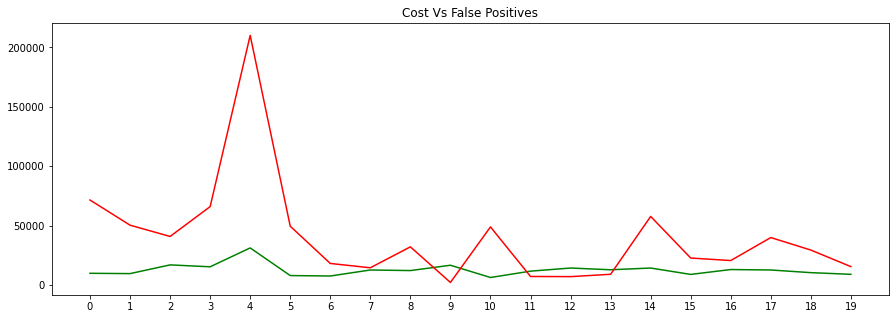

In [250]:
# Check the relation between Cost and False Positive cases (we want both to be less)
plt.figure(figsize = (15,5))
plt.title('Cost Vs False Positives')
plt.xticks(np.arange(0,21,1))
plt.plot(model_selector.Cost, 'g')
plt.plot(model_selector.FP, 'r')
plt.show()

Based on above graph, model 11 (XGB - RO - 2) seems to do justice with Cost Vs FP comparison also. 

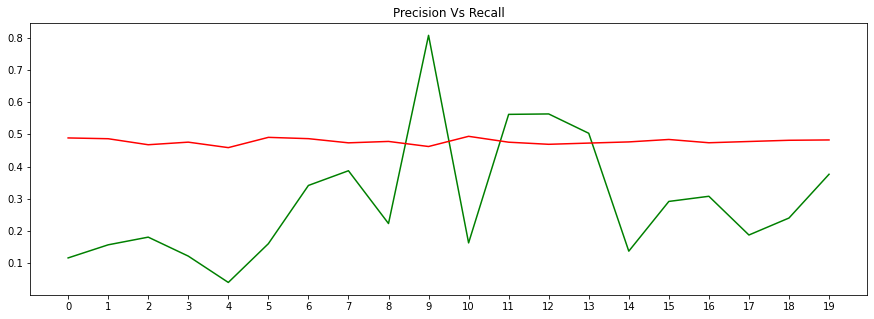

In [251]:
# Check the relation between Precision and Recall
plt.figure(figsize = (15,5))
plt.title('Precision Vs Recall')
plt.xticks(np.arange(0,21,1))
plt.plot(model_selector.Precision, 'g')
plt.plot(model_selector.Recall/2, 'r')
plt.show()

- Based on the above analysis, model 'XGB - RO - 2' seems to be best suited for the job. It has low incorrect fraud tagging and still not so high cost. It also has comparative Precision and Recall.
- Let's try some more modification to see if we can get even better.

In [252]:
# Parameter grid for GridSearch CV method
params = {
    'learning_rate': [0.5],
    'max_depth': [10],
    'n_estimators': [15],
    'max_features': [14],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_leaf_nodes': [5, 10, 15]
#    'random_state': [41, 63],
}

In [253]:
# XGB on Over Sampled data with parameter tuining
xgb_ro = XGBClassifier()
my_scorer = make_scorer(my_score, greater_is_better=False)
grid_search_xgb_ro = GridSearchCV(estimator=xgb_ro, 
                                    param_grid=params, 
                                    cv=3, n_jobs=-1, verbose=1, scoring = my_scorer)
grid_search_xgb_ro.fit(X_train_ro, y_train_ro)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[21:01:56] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features", "max_leaf_nodes", "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                        

In [254]:
# Getting the data for all the models hence created
score_df = pd.DataFrame(grid_search_xgb_ro.cv_results_)
score_df.sort_values(['rank_test_score'], inplace=True)

In [255]:
# Getting the best model based on the score
dt_best = grid_search_xgb_ro.best_estimator_
dt_best

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=14, max_leaf_nodes=5,
              max_leaves=0, min_child_weight=1, min_samples_leaf=1, missing=nan,
              monotone_constraints='()', n_estimators=15, n_jobs=0,
              num_parallel_tree=1, predictor='auto', ...)

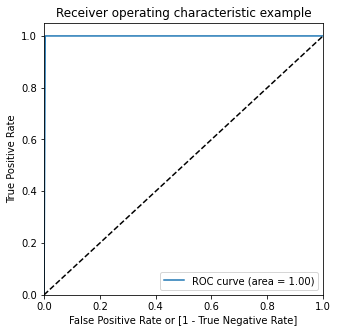

Accuracy    :  0.9979687905161466
Sensitivity :  1.0
Specificity :  0.9959375810322932
Pricision   :  0.9959540175083105
Recall      :  1.0
[[898752   3666]
 [     0 902418]]


In [256]:
# Test the performance of best model on train dataset
y_train_pred = dt_best.predict(X_train_ro)
draw_roc(y_train_ro, y_train_pred)
model_metrics(y_train_ro, y_train_pred)

In [257]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = dt_best.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9979687905161466
Accuracy    :  0.9959610960787597
Sensitivity :  1.0
Specificity :  0.9959375810322932
Pricision   :  0.5890134529147982
Recall      :  1.0
[[898752   3666]
 [     0   5254]]


In [258]:
# Test the performance of the model on test dataset
y_test_pred = dt_best.predict(X_test)
print ('AUC         : ', metrics.roc_auc_score( y_test, y_test_pred))
model_metrics(y_test, y_test_pred)

AUC         :  0.9541728541263415
Accuracy    :  0.9949023529381521
Sensitivity :  0.9129662522202486
Specificity :  0.9953794560324343
Pricision   :  0.5349986989331251
Recall      :  0.9129662522202486
[[384964   1787]
 [   196   2056]]


In [259]:
# Train-Test Metrices
c = cost_train_test(dt_best, 0)

[[1283716    5453]
 [    196    7310]]
Average number of transactions per month detected as fraudulent by the model:  532.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  798.0
Average number of transactions per month that are fraudulent but not detected by the model:  8.0
Cost incurred due to fraudulent transactions left undetected by the model:  4245.28
Cost incurred per month after the model is built and deployed:  5043.28


In [260]:
# Overall Metrices
c = cost(dt_best, 0)

[[1835584    7159]
 [    474    9177]]
Average number of transactions per month detected as fraudulent by the model:  681.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  1021.5
Average number of transactions per month that are fraudulent but not detected by the model:  20.0
Cost incurred due to fraudulent transactions left undetected by the model:  10613.2
Cost incurred per month after the model is built and deployed:  11634.7


Even with hyper parameter tuining the result remains the same So, we will finalize the model 11.

### Final Model

In [261]:
# four best models that balances TP, FP, FN and Cost
final_models = model_selector[(model_selector.index == 9) | 
                              (model_selector.index == 10) | 
                              (model_selector.index == 11) |
                              (model_selector.index == 13) 
                              ]
final_models

,model,FP,FN,TP,Cost,Accuracy,Sensitivity,Specificity,Precision,Recall,ROC - Train,ROC - Test,ROC - Final,cost_scaled
9,XGB - Grid Search - RO - 1,2135,732,8919,16611.30,0.998452,0.924153,0.998841,0.806857,0.924153,0.999542,0.937141,0.893862,0.166113
10,XGB - US - 2,48885,122,9529,6304.30,0.973544,0.987359,0.973472,0.163129,0.987359,0.986864,0.975739,0.969593,0.063043
11,XGB - RO - 2,7159,474,9177,11634.70,0.995879,0.950886,0.996115,0.561765,0.950886,0.997969,0.954173,0.933657,0.116347
13,XGB - ADA - 2,9012,527,9124,12808.52,0.994850,0.945394,0.995109,0.503088,0.945394,0.984361,0.957627,0.949067,0.128085


Out of the four best models, 'XGB - RO - 2' keeps the true positive comparatively high while keeping a check on false negatives (missed frauds). The model also keeps a tab on incorrectly identified frauds. In process the cost is also comparable. Hence, this is the model to be recommended.

A quick recap of the final model

In [262]:
# Final Model
xgb_ro = XGBClassifier(learning_rate=0.5, max_depth=10, n_estimators=15, max_features = 14)
xgb_ro.fit(X_train_ro, y_train_ro)

[21:03:09] WARNING: ../src/learner.cc:627: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.5, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=10, max_features=14, max_leaves=0,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=15, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

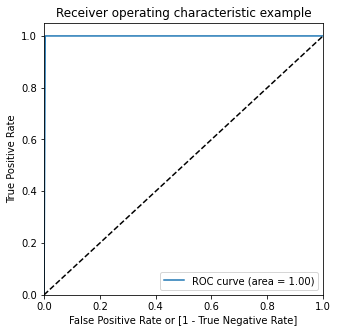

Accuracy    :  0.9979687905161466
Sensitivity :  1.0
Specificity :  0.9959375810322932
Pricision   :  0.9959540175083105
Recall      :  1.0
[[898752   3666]
 [     0 902418]]


In [263]:
# Model performance on train data
y_train_pred = xgb_ro.predict(X_train_ro)
draw_roc(y_train_ro, y_train_pred)
model_metrics(y_train_ro, y_train_pred)

In [264]:
# Test the performance of the model on the real train (imbalanced) dataset
y_train_pred = xgb_ro.predict(X_train)
print ('AUC         : ', metrics.roc_auc_score( y_train, y_train_pred))
model_metrics(y_train, y_train_pred)

AUC         :  0.9979687905161466
Accuracy    :  0.9959610960787597
Sensitivity :  1.0
Specificity :  0.9959375810322932
Pricision   :  0.5890134529147982
Recall      :  1.0
[[898752   3666]
 [     0   5254]]


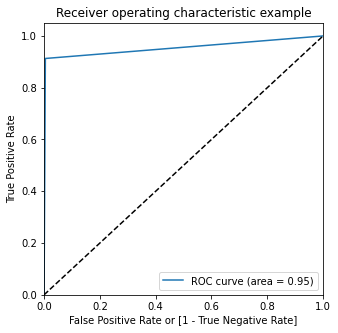

Accuracy    :  0.9949023529381521
Sensitivity :  0.9129662522202486
Specificity :  0.9953794560324343
Pricision   :  0.5349986989331251
Recall      :  0.9129662522202486
[[384964   1787]
 [   196   2056]]


In [265]:
# Model performance on test data
y_test_pred = xgb_ro.predict(X_test)
draw_roc(y_test, y_test_pred)
model_metrics(y_test, y_test_pred)

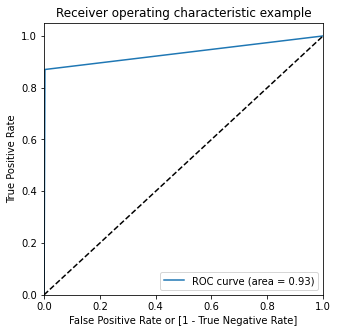

Accuracy    :  0.9964298503380306
Sensitivity :  0.8703962703962704
Specificity :  0.9969182078638086
Pricision   :  0.5225300867618248
Recall      :  0.8703962703962704
[[551868   1706]
 [   278   1867]]


In [266]:
# Model performance on final data
y_final_pred = xgb_ro.predict(X_final)
draw_roc(y_final, y_final_pred)
model_metrics(y_final, y_final_pred)

In [267]:
# Extracting the features significance
imp_df = pd.DataFrame({
    "Varname": X_train_smte.columns,
    "Imp": xgb_ro.feature_importances_})

imp_df.sort_values(by="Imp", ascending=False)

,Varname,Imp
2,amt,0.545049
16,trans_time,0.140259
1,category,0.116367
14,age,0.046123
9,city_pop,0.018570
7,lat,0.018123
3,gender,0.014420
4,city,0.013215
10,job,0.013192
5,state,0.012266


In [268]:
# Finally the financials of this model
c = cost(xgb_ro, 0)

[[1835584    7159]
 [    474    9177]]
Average number of transactions per month detected as fraudulent by the model:  681.0
Total cost of providing customer support per month for fraudulent transactions detected by the model:  1021.5
Average number of transactions per month that are fraudulent but not detected by the model:  20.0
Cost incurred due to fraudulent transactions left undetected by the model:  10613.2
Cost incurred per month after the model is built and deployed:  11634.7
